# Intraday Stock Price Predictions on AMEX, NASDAQ, NYSE

### Business Problem

Instituitional and retail investors around the world buy and sell stocks, in the hope of earning a profit from their investment.  

Investors do alot of research on which stock to buy, but not many do research on when to sell it. Most would only sell their stock when they require their money back for other purposes, and the price they sell their stock at can even be lower than the price they bought. 


Through deep learning and supervised learning, regression models will be deployed to the predict the stock price, and the mean absolute error of each model will be compared to evaluate the performance of the regression models. MAE as the evaluation metric, would mean a lower mean absolute error would mean the model is performining better. 


The end of day data from FINVIZ will be be trained on the financial sector of the stocks , and then be predicted on the other sectors. 



Angle 1 : Buying and selling the stock within the day. 

When the market opens at 9.30 p.m SGT time, i will pull from finviz to project the price for the day. As there is a Change from Open , i can get the open price for the day which is a static price. Hence with that being a reference point, and all other factors being constant for the day, i will predict the closing price for the day. Hence a trader would buy the stock at 9.30 am and hope to make a profit by 4am, when the stock market closes. 


Angle 2 : Buying and selling stocks by the next earnings date. 

As some of our features are linked to earnings release date, hence we can project the price of the company by the next earnings date. Because when the next earnings report, i.e. a company quarterly performance, features like EPS and book value will change. 

Angle 3 : Target profit for mass investors. 

Predict stock price so that investors that are holding the stock previously, and if the predicted price is nice the current market price, it is a good time to take profit 





Ideology

I am using the financial sector stocks as a sample size to determine the population price. 
 

# Data Dictionary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score , KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.model_selection import CVScores
from yellowbrick.regressor.alphas import alphas
from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor import ManualAlphaSelection
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
plt.style.use('seaborn')

C:\Users\Jeriel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('./dataset/01 Oct 2020 finviz.csv')

The dataset from Finviz contain 7529 rows and 73 columns, these 7529 rows represent the stocks that are all listed on NYSE,AMEX. 
The columns represent fundamental data of these companies. 

In [3]:
df.shape

(7565, 73)

In [4]:
df.head()

No. Ticker                       Company              Sector  \
0    1      A    Agilent Technologies, Inc.          Healthcare   
1    2     AA             Alcoa Corporation     Basic Materials   
2    3   AAAU  Perth Mint Physical Gold ETF           Financial   
3    4   AACG         ATA Creativity Global  Consumer Defensive   
4    5   AACQ       Artius Acquisition Inc.           Financial   

                        Industry Country  Market Cap    P/E  Forward P/E  \
0         Diagnostics & Research     USA    30775.94  45.74         27.6   
1                       Aluminum     USA     2145.19    NaN          NaN   
2           Exchange Traded Fund     USA         NaN    NaN          NaN   
3  Education & Training Services   China       34.93    NaN          NaN   
4                Shell Companies     USA      720.15    NaN          NaN   

    PEG  ...  Average Volume  Relative Volume   Price  Change   Volume  \
0  4.87  ...         1352.84             0.53  101.22   0.28%   723579   
1   NaN  ...         5894.30             1.03   11.39  -2.06%  6112046   
2   NaN  ...          621.06             0.73   18.97   0.90%   479346   
3   NaN  ...           62.57             0.07    1.13   2.26%     4725   
4   NaN  ...          450.21             8.19    9.94   0.00%  2674171   

           Earnings Date  Target Price    IPO Date After-Hours Close  \
0   8/18/2020 4:30:00 PM        102.38  11/18/1999            101.22   
1  10/14/2020 4:30:00 PM         13.90  10/18/2016             11.45   
2                    NaN           NaN   8/15/2018             18.98   
3        8/12/2020 16:30           NaN   1/29/2008              1.11   
4                    NaN           NaN    9/4/2020              9.86   

  After-Hours Change  
0              0.00%  
1              0.53%  
2              0.05%  
3             -1.77%  
4             -0.80%  

[5 rows x 73 columns]

# 3x Sanity Check
- Check isnull values i.e. Checking for missing values
- Check for unique type of values, must tally back, i.e. in this case # of Companies should be = # of Tickers
- Check data types to ensure the features are the right dtypes, i.e. this is also to check for % or $ signs that can cause data to be string, instead of float/integers. 

### Check for unique values

In [5]:
#check number of unique values in each column 
for i in df.columns:
   print({i},{len(list(df[i].unique()))})

{'No.'} {7565}
{'Ticker'} {7565}
{'Company'} {7521}
{'Sector'} {11}
{'Industry'} {149}
{'Country'} {49}
{'Market Cap'} {5249}
{'P/E'} {2110}
{'Forward P/E'} {2056}
{'PEG'} {817}
{'P/S'} {1644}
{'P/B'} {1214}
{'P/Cash'} {2228}
{'P/Free Cash Flow'} {1981}
{'Dividend Yield'} {1093}
{'Payout Ratio'} {886}
{'EPS (ttm)'} {1391}
{'EPS growth this year'} {2459}
{'EPS growth next year'} {3149}
{'EPS growth past 5 years'} {1265}
{'EPS growth next 5 years'} {1175}
{'Sales growth past 5 years'} {827}
{'EPS growth quarter over quarter'} {2924}
{'Sales growth quarter over quarter'} {1513}
{'Shares Outstanding'} {4493}
{'Shares Float'} {4043}
{'Insider Ownership'} {1143}
{'Insider Transactions'} {2035}
{'Institutional Ownership'} {1646}
{'Institutional Transactions'} {2298}
{'Float Short'} {1419}
{'Short Ratio'} {1238}
{'Return on Assets'} {1027}
{'Return on Equity'} {1599}
{'Return on Investment'} {1150}
{'Current Ratio'} {251}
{'Quick Ratio'} {244}
{'LT Debt/Equity'} {556}
{'Total Debt/Equity'} {59

As there are 7529 rows, and 7529 tickers, technically there should be 7529 companies, unless the companies have dual-listing type of shares, like different classes

Common example would be Google and Berkshire Hathaway, they are same company but have different share classes

# ! Check for duplicates - yet to drop duplicates

In [6]:
df[  df['Company'].isin(  df['Company'][df['Company'].duplicated()] )  ]

No. Ticker                            Company                  Sector  \
48      49   ACEV  ACE Convergence Acquisition Corp.               Financial   
49      50  ACEVU  ACE Convergence Acquisition Corp.               Financial   
207    208  AKO-A          Embotelladora Andina S.A.      Consumer Defensive   
208    209  AKO-B          Embotelladora Andina S.A.      Consumer Defensive   
599    600  BATRA           The Liberty Braves Group  Communication Services   
...    ...    ...                                ...                     ...   
6918  6919     UN                 The Unilever Group      Consumer Defensive   
6932  6933   UONE                    Urban One, Inc.  Communication Services   
6933  6934  UONEK                    Urban One, Inc.  Communication Services   
7524  7525      Z                 Zillow Group, Inc.  Communication Services   
7535  7536     ZG                 Zillow Group, Inc.  Communication Services   

                            Industry      Country  Market Cap    P/E  \
48                   Shell Companies          USA      225.17    NaN   
49                   Shell Companies          USA         NaN    NaN   
207        Beverages - Non-Alcoholic        Chile     1656.50  11.01   
208        Beverages - Non-Alcoholic        Chile     1884.37   8.94   
599                    Entertainment          USA    21097.93    NaN   
...                              ...          ...         ...    ...   
6918   Household & Personal Products  Netherlands   159499.45  23.14   
6932                    Broadcasting          USA        7.74    NaN   
6933                    Broadcasting          USA       34.13    NaN   
7524  Internet Content & Information          USA    17287.17    NaN   
7535  Internet Content & Information          USA    23570.70    NaN   

      Forward P/E   PEG  ...  Average Volume  Relative Volume   Price  \
48            NaN   NaN  ...           45.47            13.87    9.79   
49            NaN   NaN  ...          326.75             0.09   10.10   
207           NaN   NaN  ...            3.65            12.86   10.50   
208         12.15  0.85  ...            5.35             0.17   12.68   
599           NaN   NaN  ...           82.93             0.67   21.03   
...           ...   ...  ...             ...              ...     ...   
6918        19.51  2.49  ...         1409.06             0.93   60.73   
6932          NaN   NaN  ...         2001.34             0.99    4.89   
6933          NaN   NaN  ...         1924.02             0.48    1.14   
7524          NaN   NaN  ...         3644.23             0.98  107.53   
7535          NaN   NaN  ...          703.55             1.70  107.56   

       Change   Volume         Earnings Date  Target Price    IPO Date  \
48      0.41%   259556                   NaN           NaN   9/21/2020   
49     -1.46%    29564                   NaN           NaN   7/28/2020   
207    -1.04%    37850                   NaN           NaN    7/7/1994   
208    -2.46%      921                   NaN         17.83    4/7/1997   
599     0.72%    56513                   NaN           NaN   4/18/2016   
...       ...      ...                   ...           ...         ...   
6918    0.55%  1317341                   NaN           NaN  12/12/1961   
6932  -14.66%  1976971                   NaN           NaN    5/6/1999   
6933   -2.56%   953274  7/30/2020 8:30:00 AM           NaN    6/7/2000   
7524    5.85%  3571546        8/6/2020 16:30         91.00    8/3/2015   
7535    5.93%  1176734        8/6/2020 16:30         91.80   7/20/2011   

     After-Hours Close After-Hours Change  
48                 NaN                NaN  
49                 NaN                NaN  
207              10.52              0.22%  
208                NaN                NaN  
599              21.03              0.00%  
...                ...                ...  
6918             60.73              0.00%  
6932              4.92              0.61%  
6933              1

### Check for data types 

Noticed that some columns are object, for example Dividend Yield, it is considered object due to the % sign, hence will adjust for the removal of % and convert such columns to float

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 73 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   No.                                7565 non-null   int64  
 1   Ticker                             7565 non-null   object 
 2   Company                            7565 non-null   object 
 3   Sector                             7565 non-null   object 
 4   Industry                           7565 non-null   object 
 5   Country                            7565 non-null   object 
 6   Market Cap                         5340 non-null   float64
 7   P/E                                2617 non-null   float64
 8   Forward P/E                        2888 non-null   float64
 9   PEG                                1663 non-null   float64
 10  P/S                                4780 non-null   float64
 11  P/B                                4783 non-null   float

In [8]:
str_columns = ['object']
num_columns = ['float64','int64']

df_num_cols = df.select_dtypes(include = num_columns)
df_str_cols = df.select_dtypes(include = str_columns)

In [9]:
list(df_num_cols.columns)

['No.',
 'Market Cap',
 'P/E',
 'Forward P/E',
 'PEG',
 'P/S',
 'P/B',
 'P/Cash',
 'P/Free Cash Flow',
 'EPS (ttm)',
 'Shares Outstanding',
 'Shares Float',
 'Short Ratio',
 'Current Ratio',
 'Quick Ratio',
 'LT Debt/Equity',
 'Total Debt/Equity',
 'Beta',
 'Average True Range',
 'Relative Strength Index (14)',
 'Analyst Recom',
 'Average Volume',
 'Relative Volume',
 'Price',
 'Volume',
 'Target Price',
 'After-Hours Close']

In [10]:
list(df_str_cols.columns)

['Ticker',
 'Company',
 'Sector',
 'Industry',
 'Country',
 'Dividend Yield',
 'Payout Ratio',
 'EPS growth this year',
 'EPS growth next year',
 'EPS growth past 5 years',
 'EPS growth next 5 years',
 'Sales growth past 5 years',
 'EPS growth quarter over quarter',
 'Sales growth quarter over quarter',
 'Insider Ownership',
 'Insider Transactions',
 'Institutional Ownership',
 'Institutional Transactions',
 'Float Short',
 'Return on Assets',
 'Return on Equity',
 'Return on Investment',
 'Gross Margin',
 'Operating Margin',
 'Profit Margin',
 'Performance (Week)',
 'Performance (Month)',
 'Performance (Quarter)',
 'Performance (Half Year)',
 'Performance (Year)',
 'Performance (YTD)',
 'Volatility (Week)',
 'Volatility (Month)',
 '20-Day Simple Moving Average',
 '50-Day Simple Moving Average',
 '200-Day Simple Moving Average',
 '50-Day High',
 '50-Day Low',
 '52-Week High',
 '52-Week Low',
 'Change from Open',
 'Gap',
 'Change',
 'Earnings Date',
 'IPO Date',
 'After-Hours Change']

### Handling for % signs after noticing some columns are string

In [11]:
# only selecting string columns that has % sign in them to adjust
pct_cols=[]
for i in df_str_cols:
    if '%' in str(df_str_cols[i]):
        pct_cols.append(df_str_cols[i].name)
      


In [12]:
#function to remove %
def pct_remove(value1):
    if '%' in str(value1):
        value1 = value1.replace('%','')
    return value1

In [13]:
for x in pct_cols:
    df[x]=df[x].map(pct_remove)
    df[x]=df[x].astype('float64')
    df[x]=df[x]/100

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 73 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   No.                                7565 non-null   int64  
 1   Ticker                             7565 non-null   object 
 2   Company                            7565 non-null   object 
 3   Sector                             7565 non-null   object 
 4   Industry                           7565 non-null   object 
 5   Country                            7565 non-null   object 
 6   Market Cap                         5340 non-null   float64
 7   P/E                                2617 non-null   float64
 8   Forward P/E                        2888 non-null   float64
 9   PEG                                1663 non-null   float64
 10  P/S                                4780 non-null   float64
 11  P/B                                4783 non-null   float

### ! Check for isnull !!!!!! yet to handle isnull , still deciding
- drop / imputation 


In [15]:
# this is just to check which columns dont have missing values
final_features = [i for i in df.isnull().sum()[df.isnull().sum() == 0].index if i != 'Price']
final_features

['No.',
 'Ticker',
 'Company',
 'Sector',
 'Industry',
 'Country',
 'Performance (YTD)',
 'Average True Range',
 '20-Day Simple Moving Average',
 '50-Day Simple Moving Average',
 '200-Day Simple Moving Average',
 '50-Day High',
 '50-Day Low',
 '52-Week High',
 'Change from Open',
 'Gap',
 'Average Volume',
 'Relative Volume',
 'Change',
 'Volume',
 'IPO Date']

In [16]:
#imputation to be decided, to either impute 0

df.fillna(0,inplace=True)

In [17]:
df.isnull().sum().sort_values(ascending = False).head(50)

After-Hours Change                   0
Current Ratio                        0
EPS growth past 5 years              0
EPS growth next 5 years              0
Sales growth past 5 years            0
EPS growth quarter over quarter      0
Sales growth quarter over quarter    0
Shares Outstanding                   0
Shares Float                         0
Insider Ownership                    0
Insider Transactions                 0
Institutional Ownership              0
Institutional Transactions           0
Float Short                          0
Short Ratio                          0
Return on Assets                     0
Return on Equity                     0
EPS growth next year                 0
EPS growth this year                 0
EPS (ttm)                            0
P/E                                  0
Ticker                               0
Company                              0
Sector                               0
Industry                             0
Country                  

# Feature Formatting 

In [18]:
df['Market Cap'] = df['Market Cap'] * 1_000_000

In [19]:
df['Shares Outstanding'] = df['Shares Outstanding'] * 1_000_000


In [20]:
df['Shares Float'] = df['Shares Float'] * 1_000_000


In [21]:
df['Average Volume'] = df['Average Volume'] * 1_000

In [22]:
# 52 week high and 52 week low 
df['52wkhigh'] =( df['Price']) / (1+df['52-Week High'])

In [23]:
df['52wklow'] = ( df['Price']) / ( 1+df['52-Week Low'])


In [24]:
df['dividend'] = (df['Dividend Yield'] ) * (df['Price'])


In [25]:
df['50 sma price'] = (df['Price']) / (1 + df['50-Day Simple Moving Average'] )

In [26]:
#change 200 SMA percentage to price
df['200 sma price'] = (df['Price']) / (1 + df['200-Day Simple Moving Average'] )

#  Feature Engineering

### Implementing Golden Cross Strategy 

In [27]:
def goldencross(row_value_of):
    
    if row_value_of['Price'] > row_value_of['50 sma price'] > row_value_of['200 sma price']:
        output = 'buy'
    elif row_value_of['Price'] < row_value_of['50 sma price'] < row_value_of['200 sma price']:
        output = 'sell'
    else:
        output ='neutral'        
    return output
    

In [28]:
df['goldencross']= df.apply(goldencross,axis=1)

df['prev close'] = (df['Price']) / (1 + df['Change'] )
df['change value'] = df['prev close'] * df['Change']

In [29]:
def rsi(x1):
    if x1['Relative Strength Index (14)'] >= 70:
        output = 'sell'
    elif x1['Relative Strength Index (14)'] <= 30:
        output = 'buy'
    else:
        output = 'neutral'
    return output

In [30]:
df['rsi'] = df.apply(rsi,axis=1)

# EDA 

### At the top identified that Sector only has 11 unique values, hence we can do a study on the sector stocks

In [31]:
 print(list(df['Sector'].unique()))

['Healthcare', 'Basic Materials', 'Financial', 'Consumer Defensive', 'Industrials', 'Technology', 'Consumer Cyclical', 'Real Estate', 'Energy', 'Utilities', 'Communication Services']


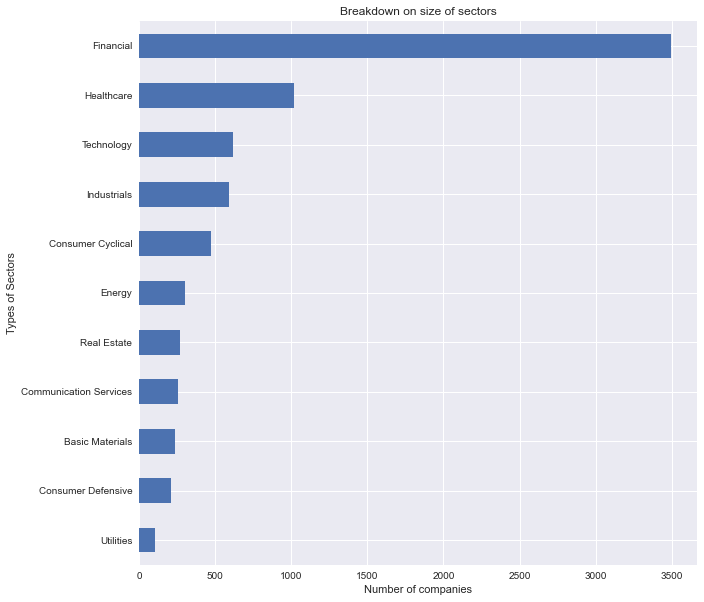

In [32]:
plt.figure(figsize=(10,10))
plt.xlabel("Number of companies") 
plt.ylabel("Types of Sectors") 
plt.title('Breakdown on size of sectors') 

df['Sector'].value_counts().sort_values(ascending = True).plot(kind='barh')

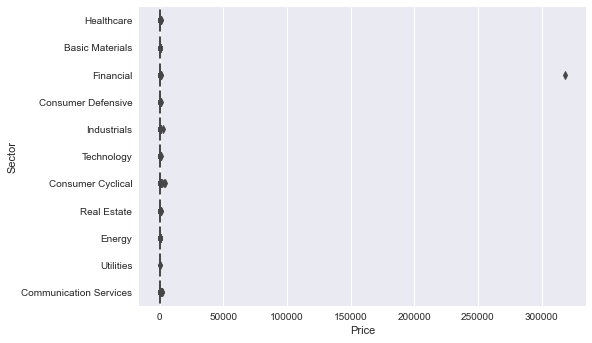

In [33]:
sns.boxplot(x='Price',y='Sector',data=df)

In [34]:
#searching for outlier
df[df['Price'] > 200000 ]

No. Ticker                  Company     Sector                 Industry  \
876  877  BRK-A  Berkshire Hathaway Inc.  Financial  Insurance - Diversified   

    Country    Market Cap    P/E  Forward P/E  PEG  ...   IPO Date  \
876     USA  5.033880e+11  23.27        20.31  1.0  ...  3/17/1980   

     After-Hours Close  After-Hours Change       52wkhigh       52wklow  \
876                0.0                 0.0  347399.411187  239440.85375   

     dividend   50 sma price  200 sma price  goldencross      rsi  
876       0.0  315040.047464  301961.899346          buy  neutral  

[1 rows x 80 columns]

In [35]:
df.drop(867,0, inplace=True)

In [36]:
df.reset_index(inplace = True, drop = True)

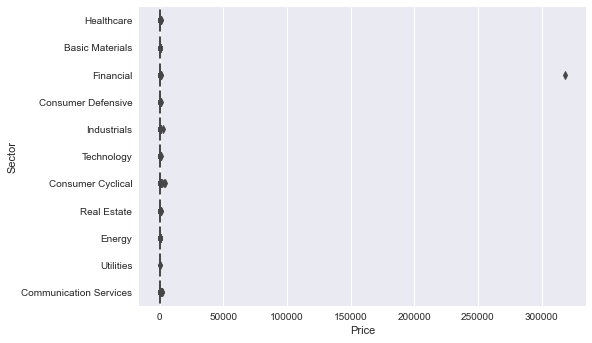

In [37]:
sns.boxplot(x='Price',y='Sector',data=df)

Dropping another 26 stocks due to heavy outliers 

In [38]:
#setting cut off for outlier
abv1000 = df.loc[df['Price']>=1000]
print(len(abv1000))

12


In [39]:
df.drop(abv1000.index,0,inplace=True)

In [40]:
df.reset_index(inplace = True, drop = True)

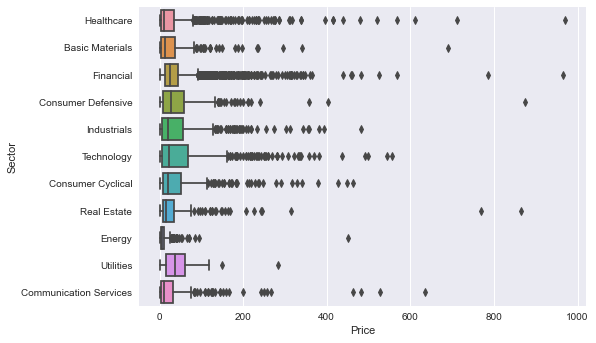

In [41]:
sns.boxplot(x='Price',y='Sector',data=df)

# Still thinking to keep only stocks below \$ 200 only

abv200 = df.loc[df['Price']>=200]
df.drop(abv200.index,0,inplace=True)
df.reset_index(inplace=True,drop=True)

sns.boxplot(x='Price',y='Sector',data=df)

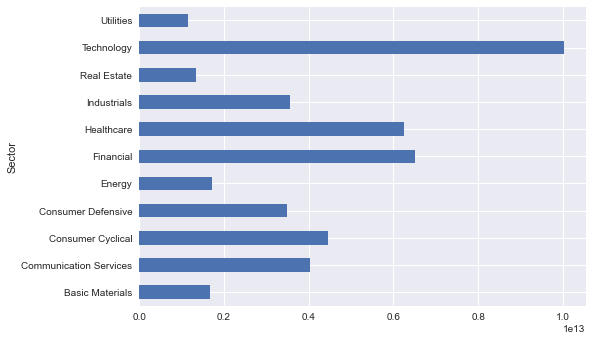

In [42]:
# underestanding the sector market cap, but stil lwill do financial stocks as they have the most number of companies
df.groupby(['Sector'])['Market Cap'].sum().plot(kind='barh')


# ! arranging the values properly on the axis to show 

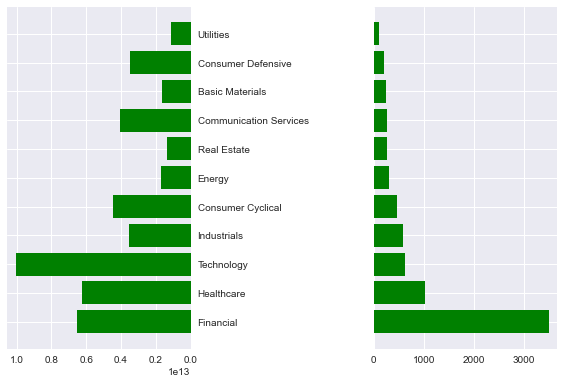

In [43]:
# y = df['Sector']
x3 = df.groupby(['Sector'])['Market Cap'].sum()
x2 = df['Sector'].value_counts()
x1 = pd.DataFrame(x3).T[list(x2.index)].T['Market Cap']
y = list(x2.index)


fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, x1, align='center', color='green')
axes[1].barh(y, x2, align='center', color='green')

#axes[0] = axes[1].twinx()
axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=y)
axes[0].yaxis.tick_right()

fig.tight_layout()
fig.subplots_adjust(wspace=1)
plt.show()

# EDA - continuous features using scatterplot

In [44]:
df_fin = df[df['Sector'] == 'Financial']

In [45]:
df_fin

No. Ticker                                            Company  \
2        3   AAAU                       Perth Mint Physical Gold ETF   
4        5   AACQ                            Artius Acquisition Inc.   
5        6   AADR                AdvisorShares Dorsey Wright ADR ETF   
7        8   AAMC            Altisource Asset Management Corporation   
8        9   AAME                      Atlantic American Corporation   
...    ...    ...                                                ...   
7528  7542   ZION         Zions Bancorporation, National Association   
7534  7548   ZMLP        Direxion Zacks MLP High Income Index Shares   
7539  7553   ZROZ  PIMCO 25+ Year Zero Coupon U.S. Treasury Index...   
7542  7556    ZSL                        ProShares UltraShort Silver   
7544  7558    ZTR                      Virtus Total Return Fund Inc.   

         Sector                  Industry Country    Market Cap    P/E  \
2     Financial      Exchange Traded Fund     USA  0.000000e+00   0.00   
4     Financial           Shell Companies     USA  7.201500e+08   0.00   
5     Financial      Exchange Traded Fund     USA  0.000000e+00   0.00   
7     Financial          Asset Management     USA  3.318000e+07   0.00   
8     Financial          Insurance - Life     USA  4.004000e+07   0.00   
...         ...                       ...     ...           ...    ...   
7528  Financial          Banks - Regional     USA  4.736370e+09  11.62   
7534  Financial      Exchange Traded Fund     USA  0.000000e+00   0.00   
7539  Financial      Exchange Traded Fund     USA  0.000000e+00   0.00   
7542  Financial      Exchange Traded Fund     USA  0.000000e+00   0.00   
7544  Financial  Closed-End Fund - Equity     USA  3.714200e+08   0.00   

      Forward P/E  PEG  ...    IPO Date  After-Hours Close  \
2            0.00  0.0  ...   8/15/2018              18.98   
4            0.00  0.0  ...    9/4/2020               9.86   
5            0.00  0.0  ...   7/21/2010              56.16   
7            0.00  0.0  ...  12/13/2012               0.00   
8            0.00  0.0  ...   3/17/1980               1.99   
...           ...  ...  ...         ...                ...   
7528         9.64  0.0  ...   3/17/1980              29.12   
7534         0.00  0.0  ...   1/24/2014               0.00   
7539         0.00  0.0  ...   11/4/2009             170.01   
7542         0.00  0.0  ...   12/3/2008               9.32   
7544         0.00  0.0  ...   9/23/1988               0.00   

      After-Hours Change    52wkhigh     52wklow   dividend  50 sma price  \
2                 0.0005   20.624049   14.424759   0.000000     19.374936   
4                -0.0080   10.479705    9.835741   0.000000      9.948954   
5                 0.0000   59.097127   33.750000   0.011232     56.533119   
7                 0.0000   32.238256    8.827238   0.000000     18.694917   
8                -0.0229    3.485392    1.462366   0.000000      1.976744   
...                  ...         ...         ...        ...           ...   
7528              0.0000   52.477924   23.580857   1.359904     32.173241   
7534              0.0000  100.805802   26.160602  10.198152     55.754875   
7539             -0.0088  202.982249  132.009544   3.104512    175.881870   
7542             -0.0032   56.632344    6.732916   0.000000      8.707394   
7544              0.0000   11.960336    4.869868   0.000000      8.040201   

      200 sma price  goldencross      rsi  
2         17.206349      neutral  neutral  
4          9.948954      neutral      buy  
5         51.551313      neutral  neutral  
7         16.338598          buy  neutral  
8          1.978278      neutral  neutral  
...             ...          ...      ...  
7528      35.888588         sell  neutral  
7534      63.753344         sell  neutral  
7539     166.282113      neutral  neutral  
7542      22.400575      neutral  neutral  
7544       8.965123         sell  neutral  

[3493 rows x 80 columns]

In [46]:
df_fin_num = df_fin.select_dtypes(include = num_columns)

In [47]:
df_fin_num

No.    Market Cap    P/E  Forward P/E  PEG    P/S   P/B  P/Cash  \
2        3  0.000000e+00   0.00         0.00  0.0   0.00  0.00    0.00   
4        5  7.201500e+08   0.00         0.00  0.0   0.00  0.00    0.00   
5        6  0.000000e+00   0.00         0.00  0.0   0.00  0.00    0.00   
7        8  3.318000e+07   0.00         0.00  0.0   2.05  0.00    2.10   
8        9  4.004000e+07   0.00         0.00  0.0   0.21  0.34    2.44   
...    ...           ...    ...          ...  ...    ...   ...     ...   
7528  7542  4.736370e+09  11.62         9.64  0.0   1.86  0.68    1.40   
7534  7548  0.000000e+00   0.00         0.00  0.0   0.00  0.00    0.00   
7539  7553  0.000000e+00   0.00         0.00  0.0   0.00  0.00    0.00   
7542  7556  0.000000e+00   0.00         0.00  0.0   0.00  0.00    0.00   
7544  7558  3.714200e+08   0.00         0.00  0.0  23.76  0.90    0.00   

      P/Free Cash Flow  Dividend Yield  ...  Change   Volume  Target Price  \
2                 0.00          0.0000  ...  0.0090   479346          0.00   
4                 0.00          0.0000  ...  0.0000  2674171          0.00   
5                 0.00          0.0002  ...  0.0161     6109          0.00   
7                 0.00          0.0000  ...  0.0125     3195          0.00   
8                 6.90          0.0000  ...  0.0184     1009          0.00   
...                ...             ...  ...     ...      ...           ...   
7528             10.01          0.0467  ... -0.0034  1515206         36.59   
7534              0.00          0.2038  ... -0.0121   152298          0.00   
7539              0.00          0.0181  ...  0.0030    66372          0.00   
7542              0.00          0.0000  ... -0.0469  3887251          0.00   
7544              0.00          0.0000  ...  0.0013    76669          0.00   

      After-Hours Close  After-Hours Change    52wkhigh     52wklow  \
2                 18.98              0.0005   20.624049   14.424759   
4                  9.86             -0.0080   10.479705    9.835741   
5                 56.16              0.0000   59.097127   33.750000   
7                  0.00              0.0000   32.238256    8.827238   
8                  1.99             -0.0229    3.485392    1.462366   
...                 ...                 ...         ...         ...   
7528              29.12              0.0000   52.477924   23.580857   
7534               0.00              0.0000  100.805802   26.160602   
7539             170.01             -0.0088  202.982249  132.009544   
7542               9.32             -0.0032   56.632344    6.732916   
7544               0.00              0.0000   11.960336    4.869868   

       dividend  50 sma price  200 sma price  
2      0.000000     19.374936      17.206349  
4      0.000000      9.948954       9.948954  
5      0.011232     56.533119      51.551313  
7      0.000000     18.694917      16.338598  
8      0.000000      1.976744       1.978278  
...         ...           ...            ...  
7528   1.359904     32.173241      35.888588  
7534  10.198152     55.754875      63.753344  
7539   3.104512    175.881870     166.282113  
7542   0.000000      8.707394      22.400575  
7544   0.000000      8.040201       8.965123  

[3493 rows x 71 columns]

In [48]:
for i in df_fin_num.columns:
    print(f'{i} # of unique values is {df_fin_num[i].nunique()}')

No. # of unique values is 3493
Market Cap # of unique values is 1278
P/E # of unique values is 665
Forward P/E # of unique values is 488
PEG # of unique values is 246
P/S # of unique values is 710
P/B # of unique values is 277
P/Cash # of unique values is 472
P/Free Cash Flow # of unique values is 445
Dividend Yield # of unique values is 914
Payout Ratio # of unique values is 347
EPS (ttm) # of unique values is 594
EPS growth this year # of unique values is 573
EPS growth next year # of unique values is 577
EPS growth past 5 years # of unique values is 431
EPS growth next 5 years # of unique values is 246
Sales growth past 5 years # of unique values is 333
EPS growth quarter over quarter # of unique values is 735
Sales growth quarter over quarter # of unique values is 543
Shares Outstanding # of unique values is 1186
Shares Float # of unique values is 737
Insider Ownership # of unique values is 342
Insider Transactions # of unique values is 472
Institutional Ownership # of unique value

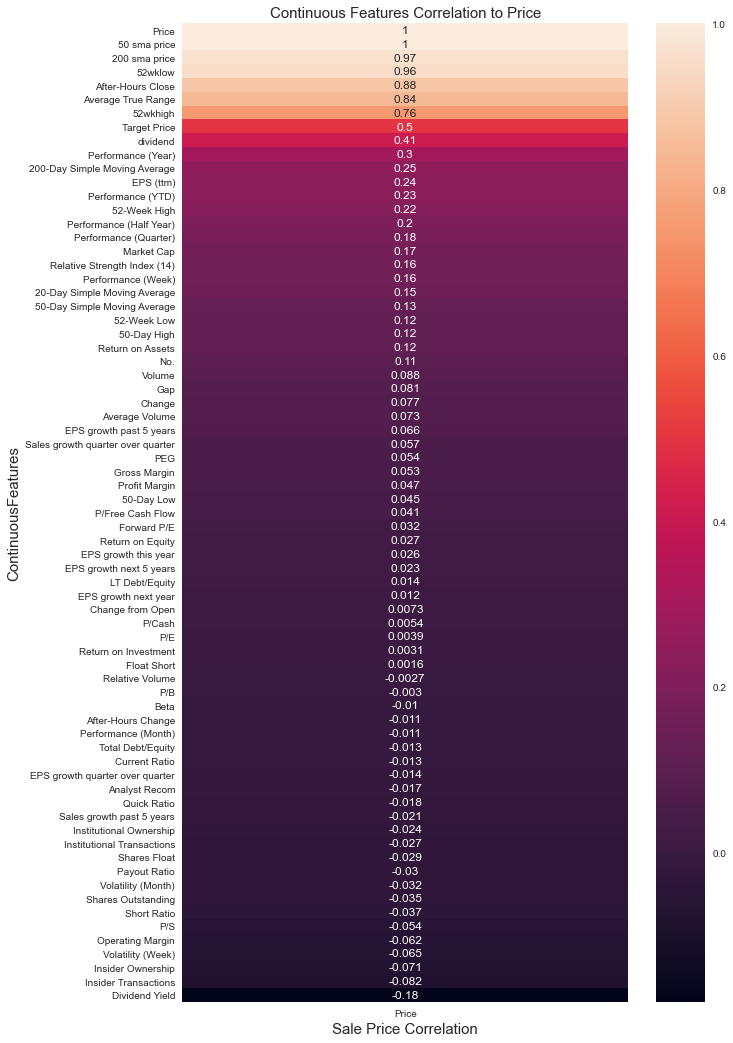

In [49]:
#plotting vertical heatmap correlation for continuous features
plt.figure(figsize = (10,18))
sns.heatmap(df_fin_num.corr()[['Price']].sort_values(by = 'Price', ascending = False), annot = True)
plt.title('Continuous Features Correlation to Price', fontsize = 15)
plt.xlabel('Sale Price Correlation', fontsize = 15)
plt.ylabel('ContinuousFeatures', fontsize = 15);

Text(0.5, 142.0, 'Price Correlation')

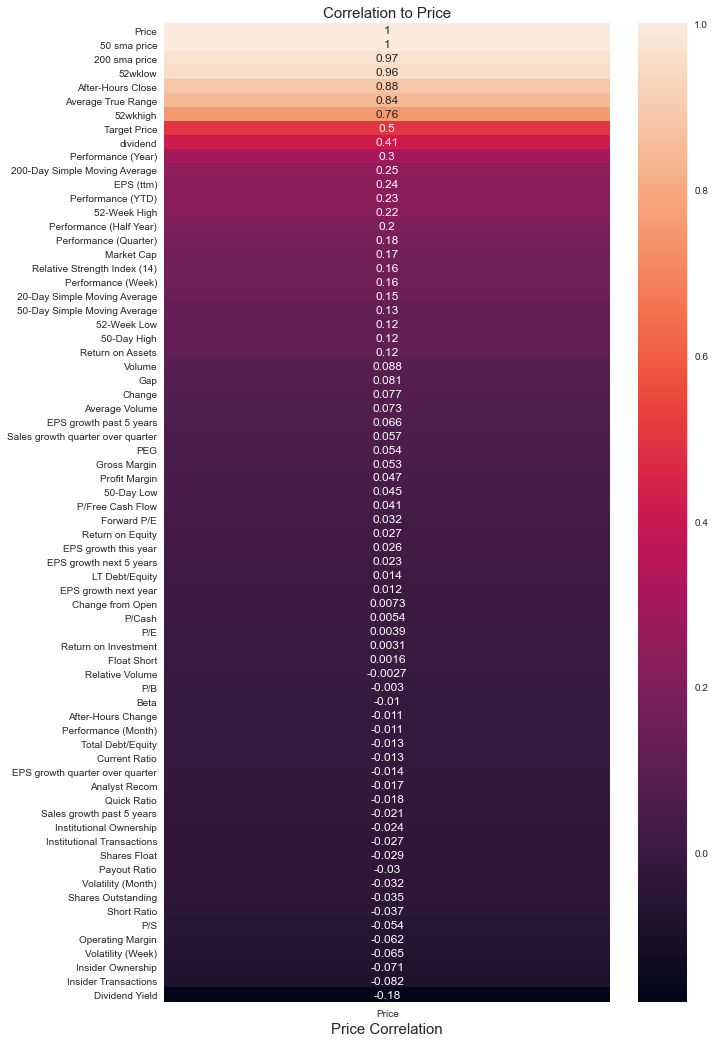

In [50]:
df_corr  = df_fin_num[df_fin_num.columns[1:]].corr()[['Price']].sort_values(by = 'Price',ascending=False)
plt.figure(figsize = (10,18))
sns.heatmap(df_corr, annot=True)
plt.title('Correlation to Price', fontsize = 15)
plt.xlabel('Price Correlation', fontsize = 15)
# plt.ylabel('Features', fontsize = 2);

<ipython-input-51-cee7e41768d8>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (12,5))


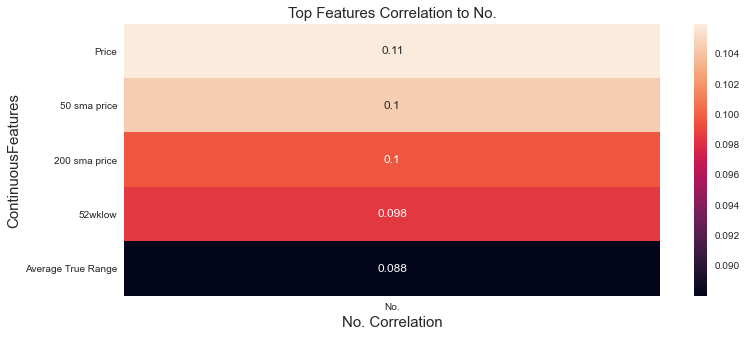

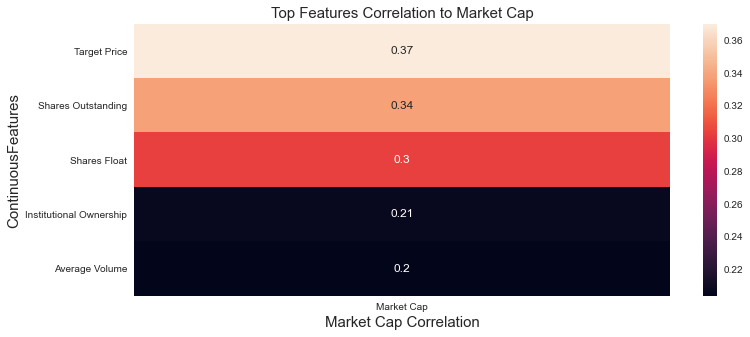

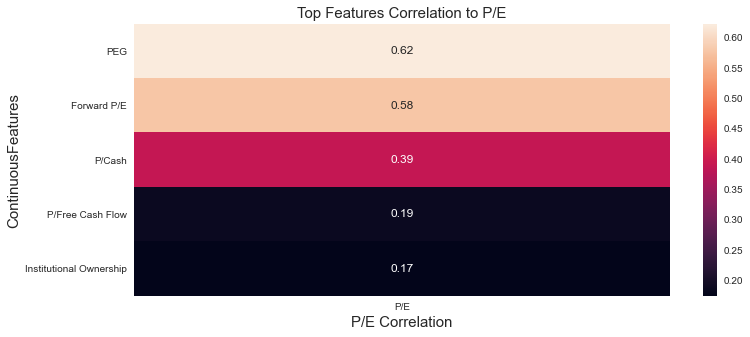

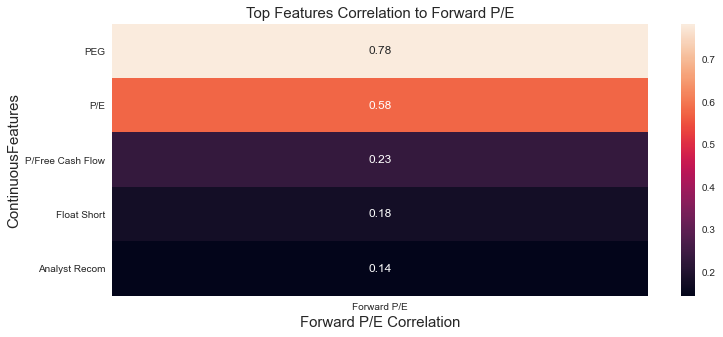

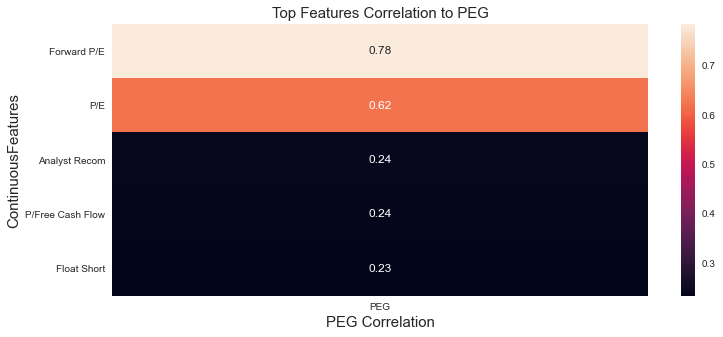

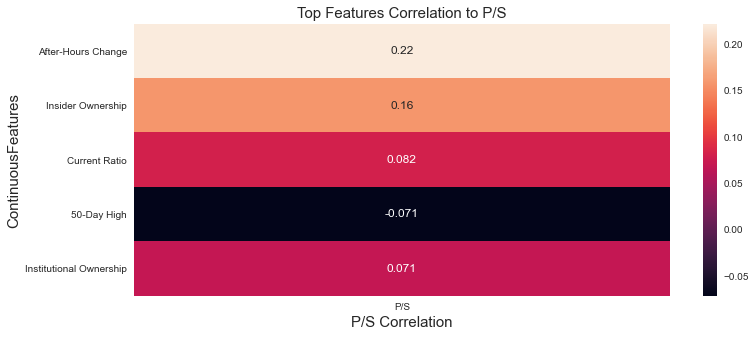

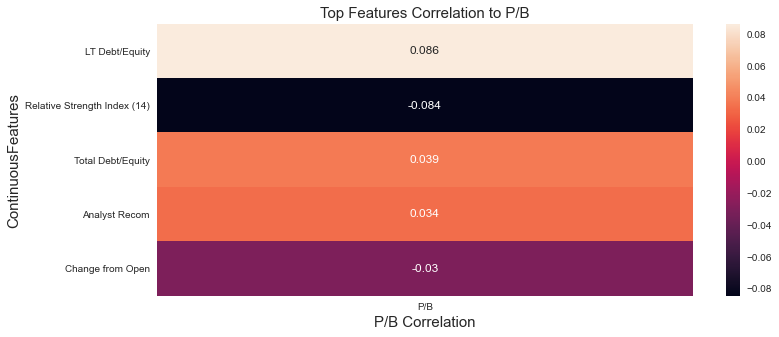

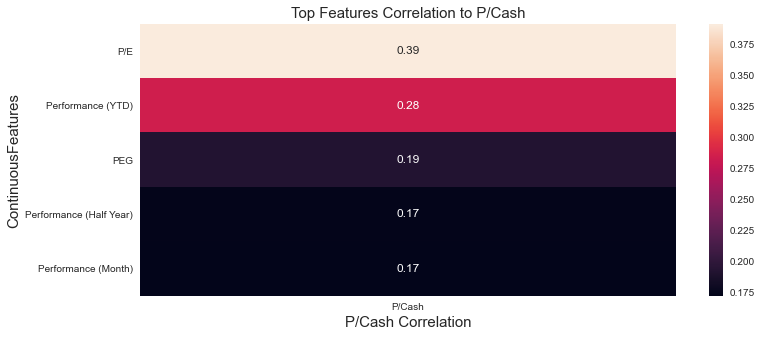

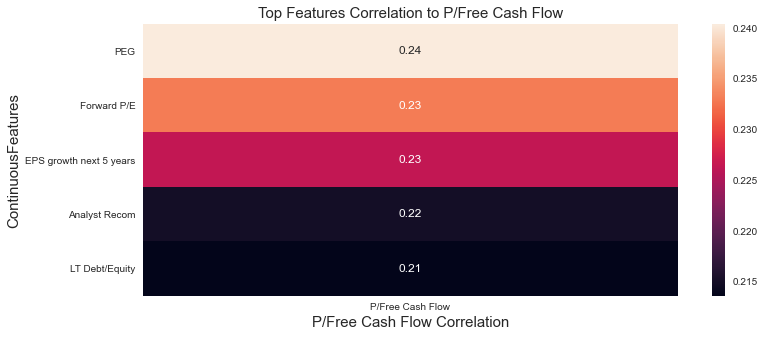

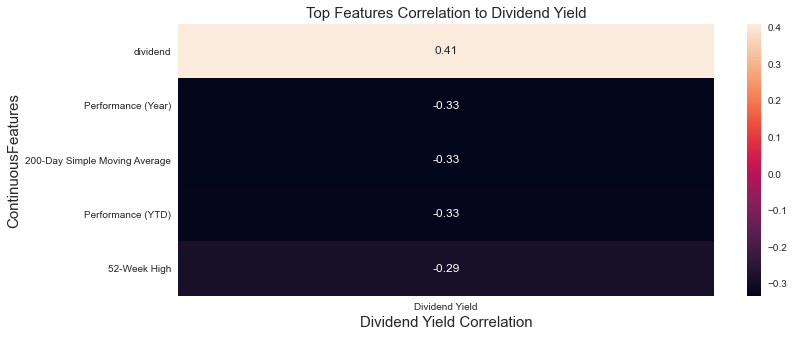

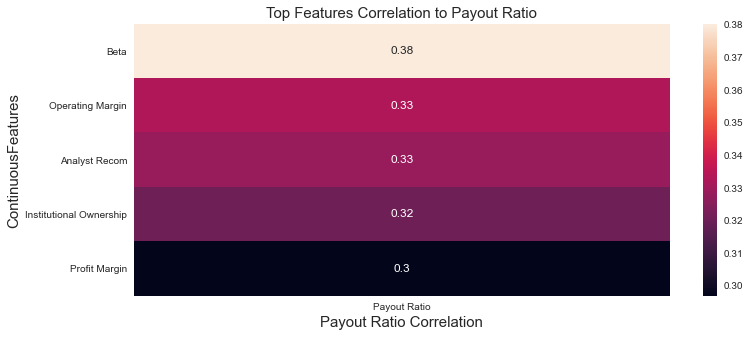

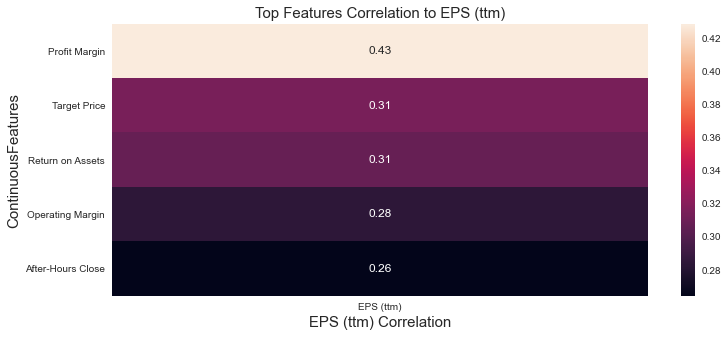

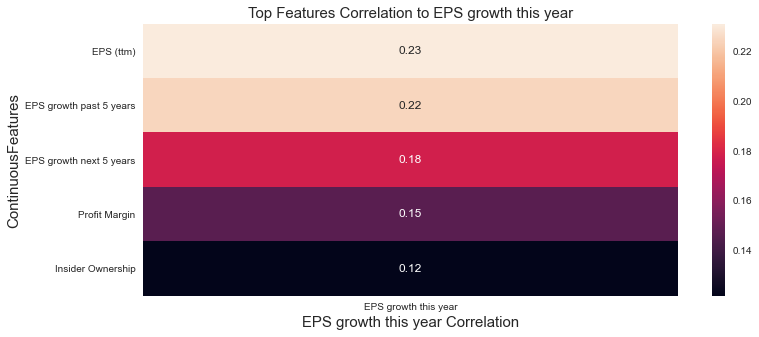

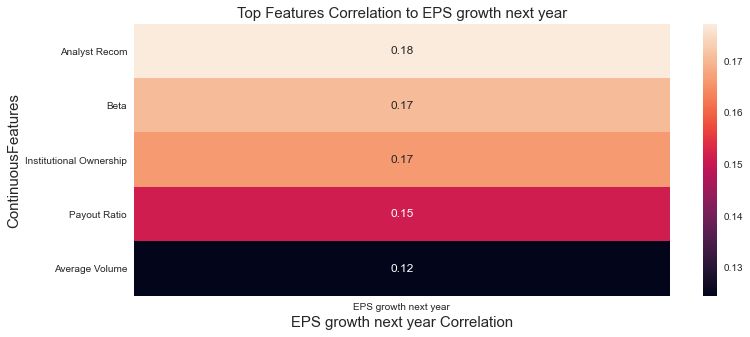

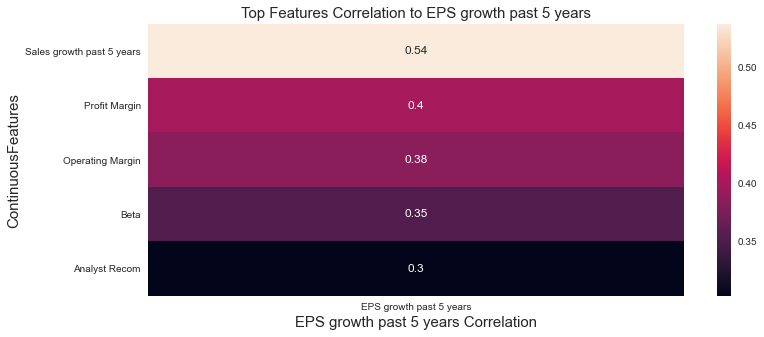

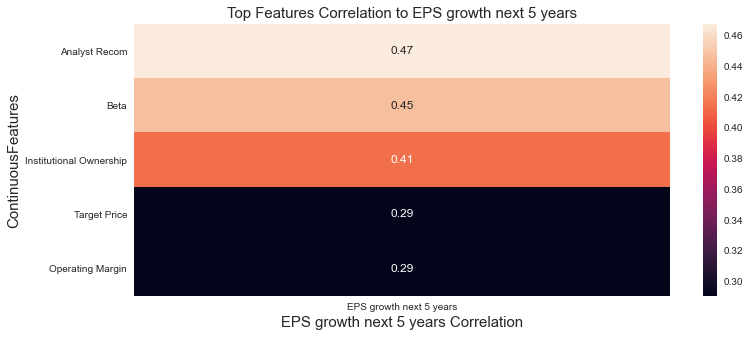

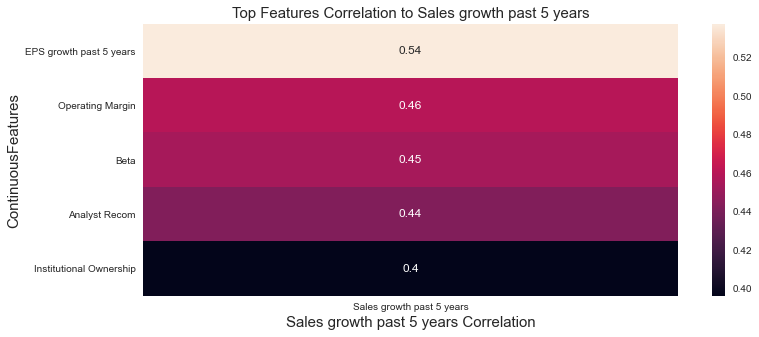

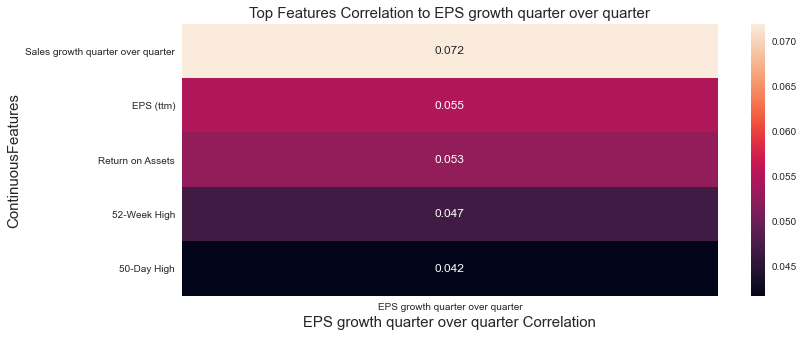

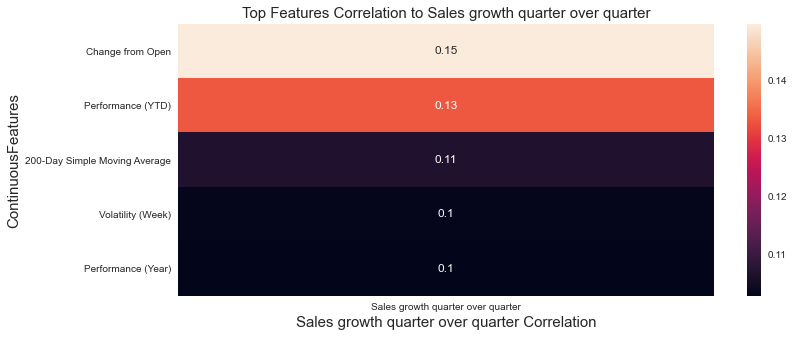

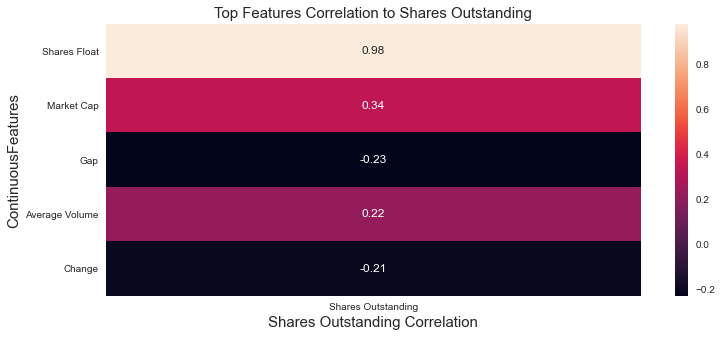

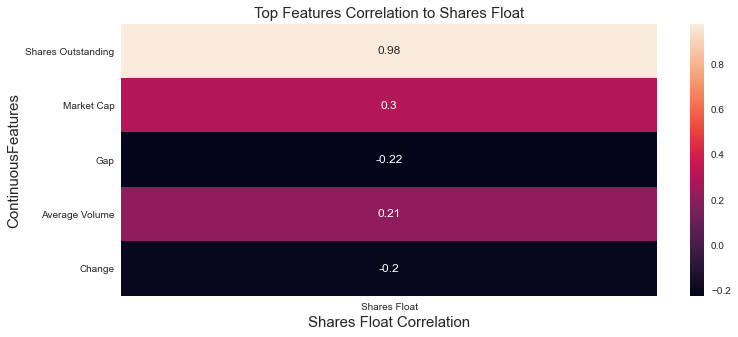

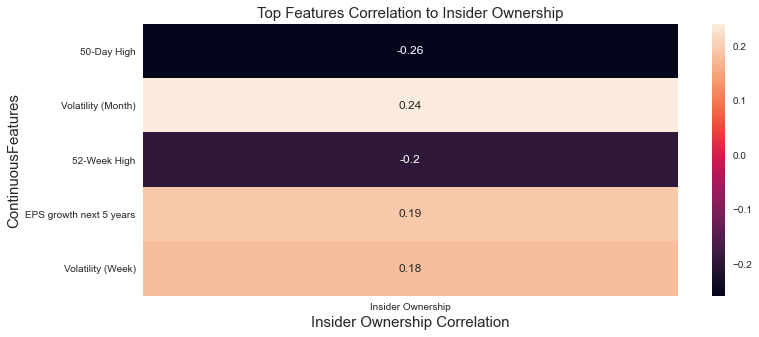

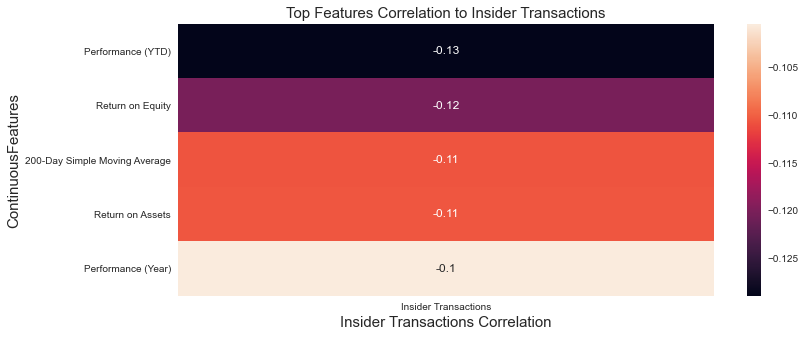

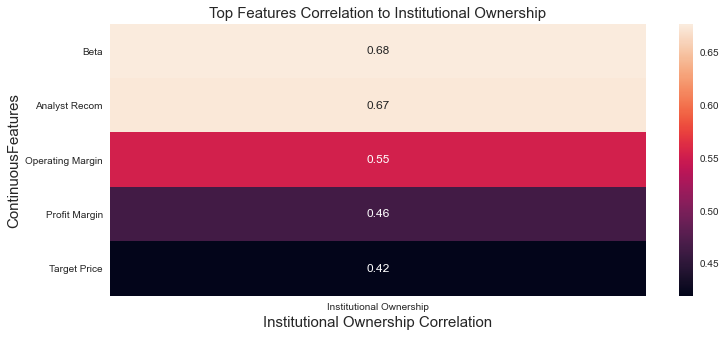

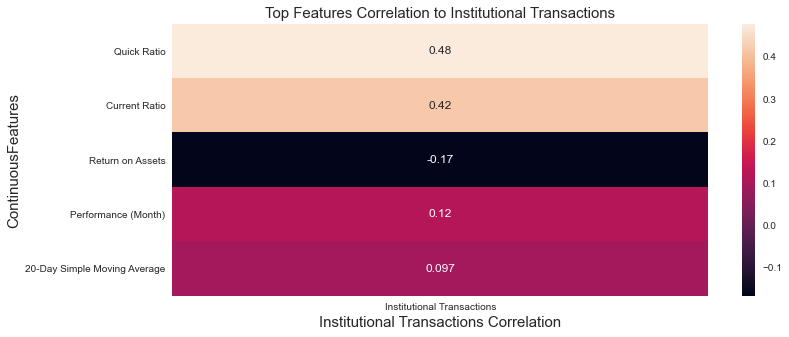

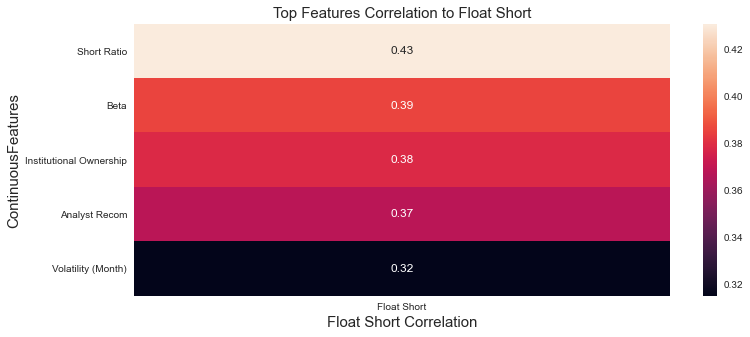

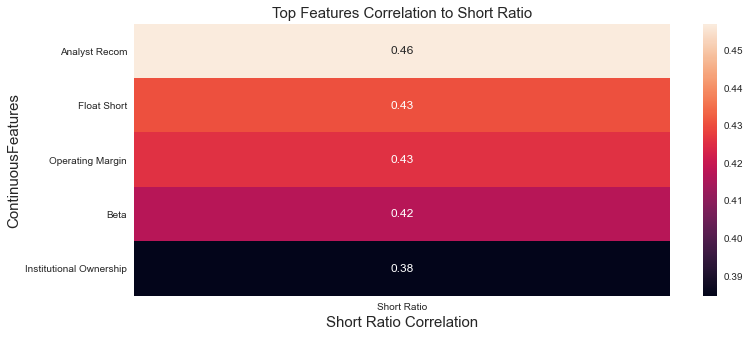

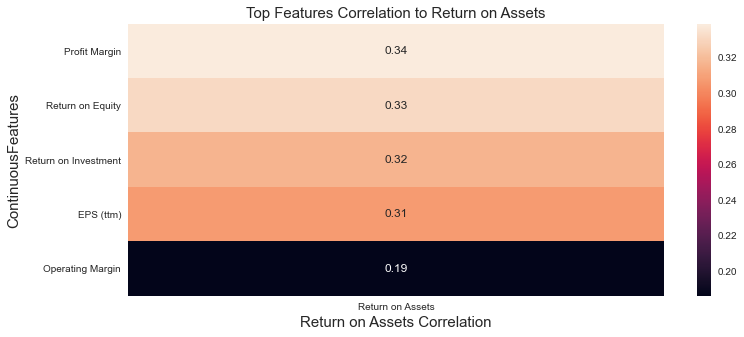

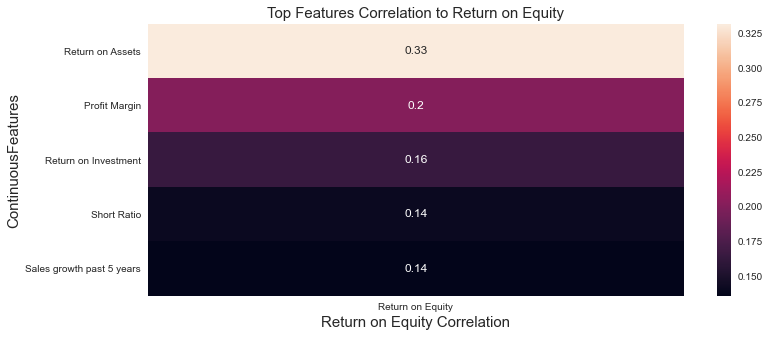

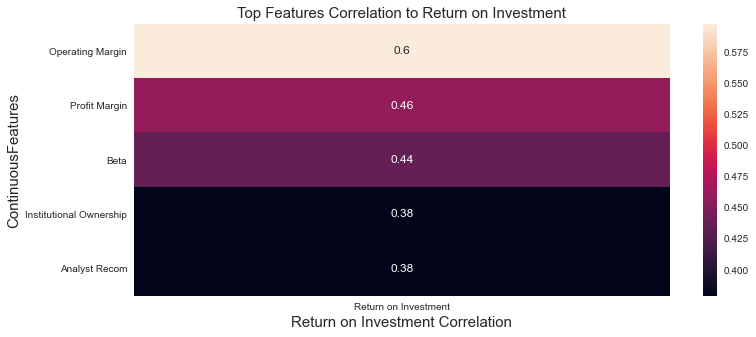

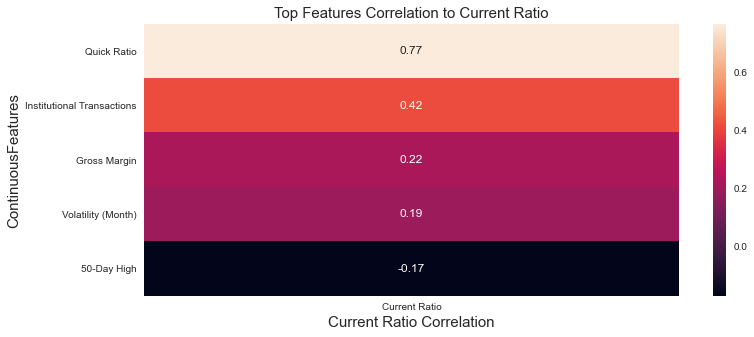

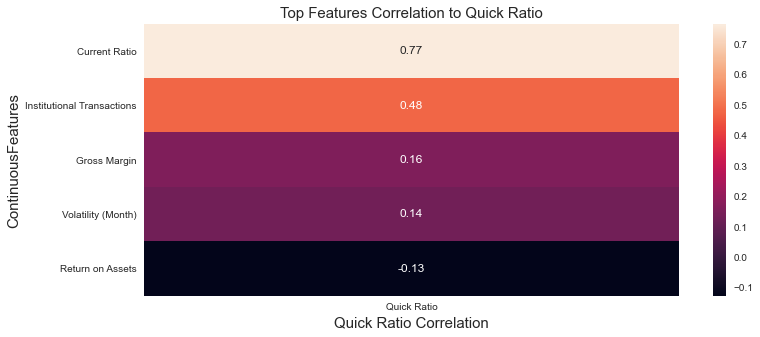

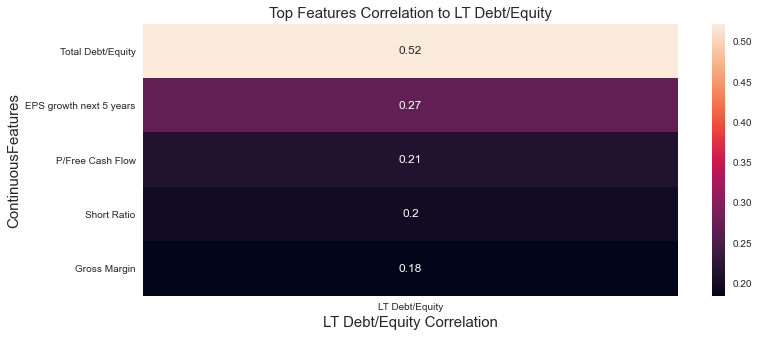

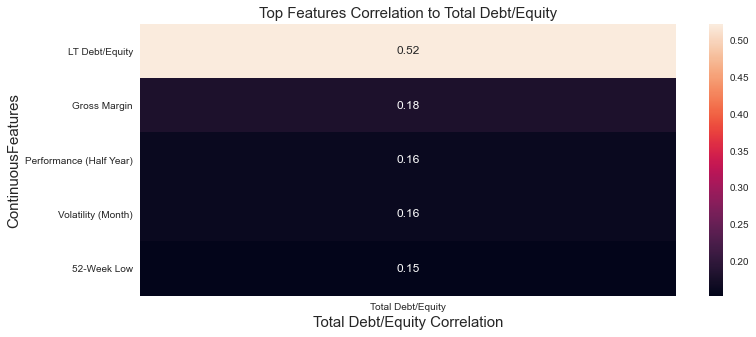

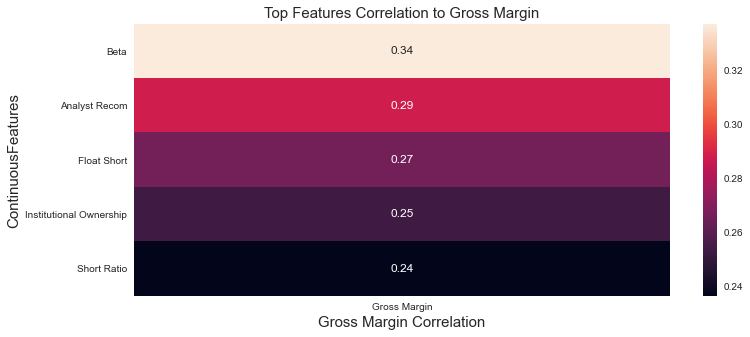

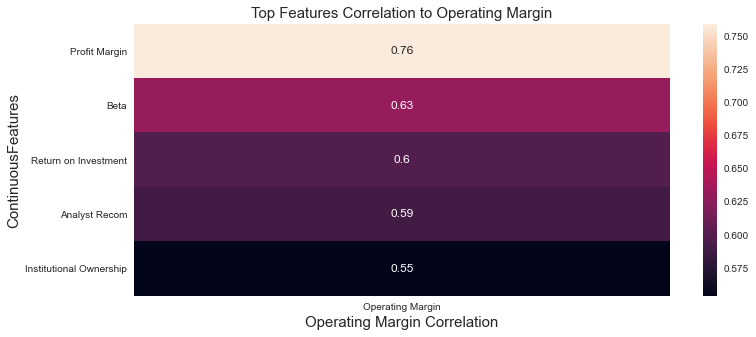

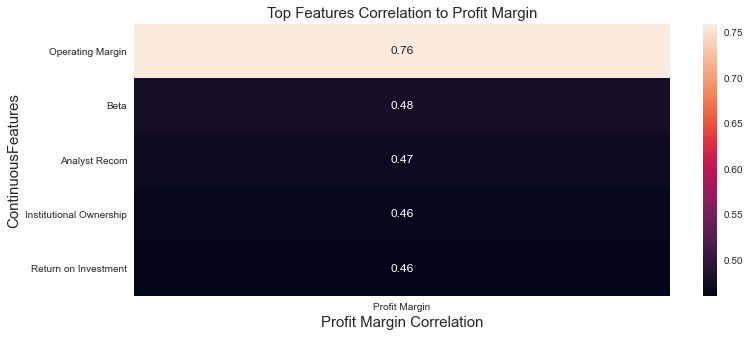

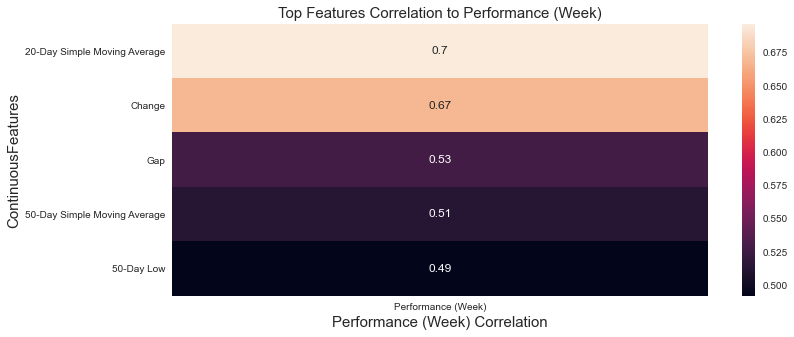

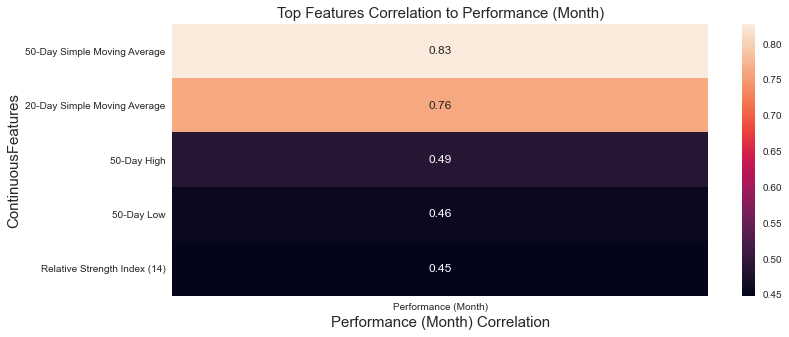

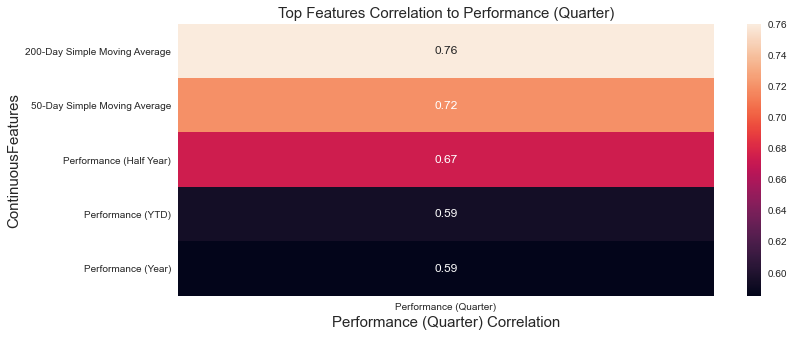

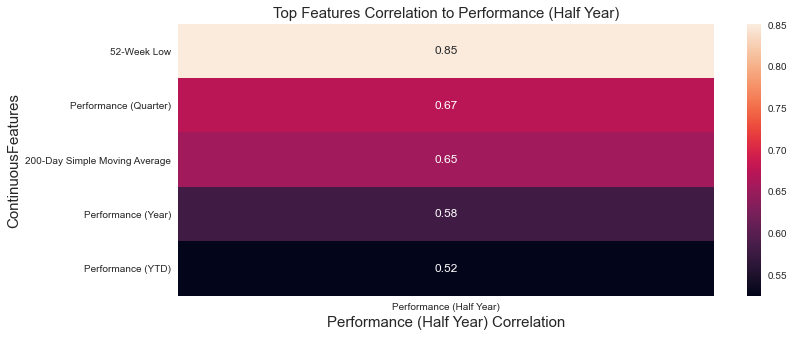

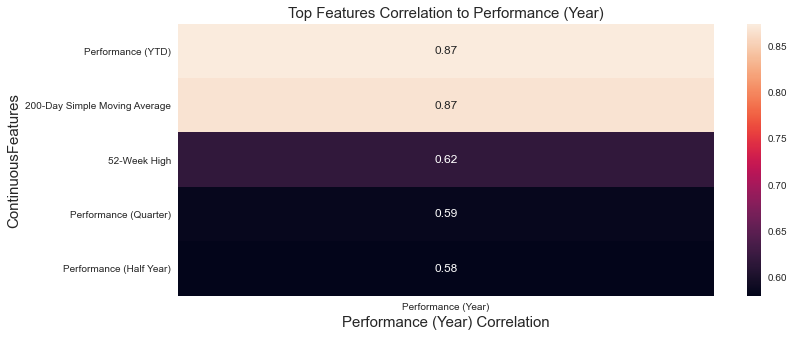

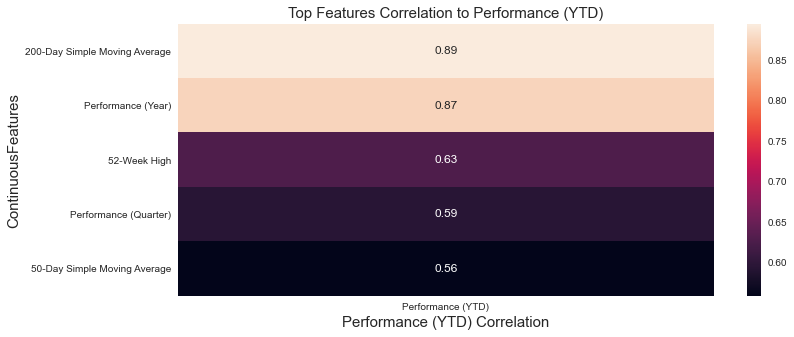

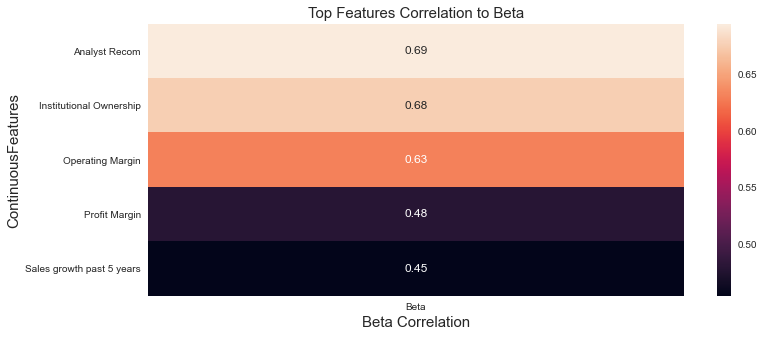

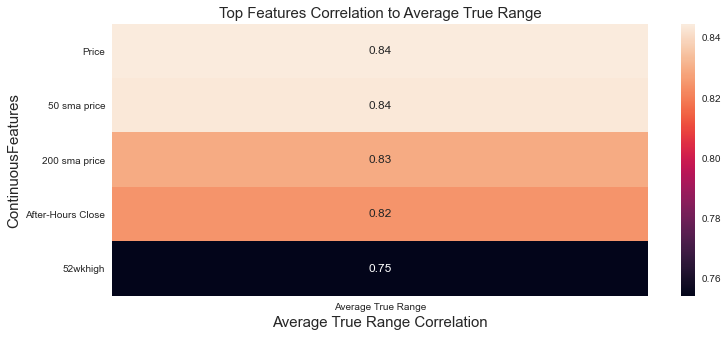

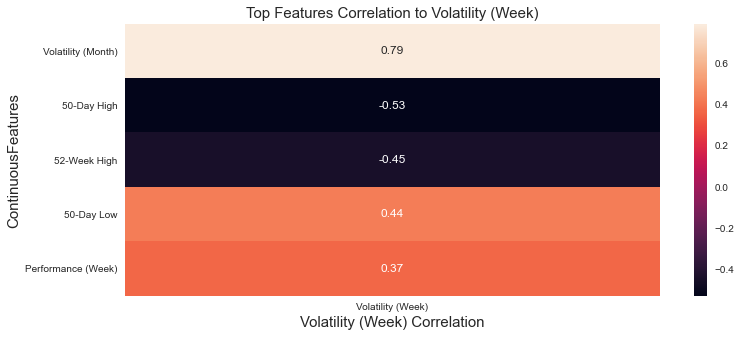

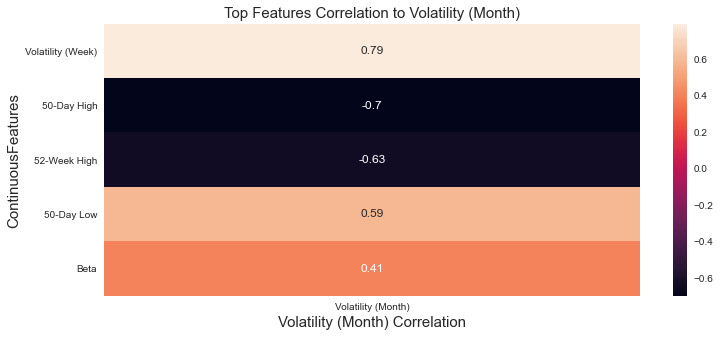

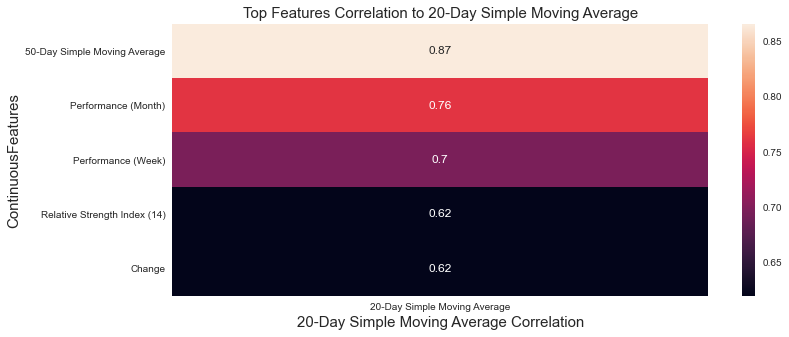

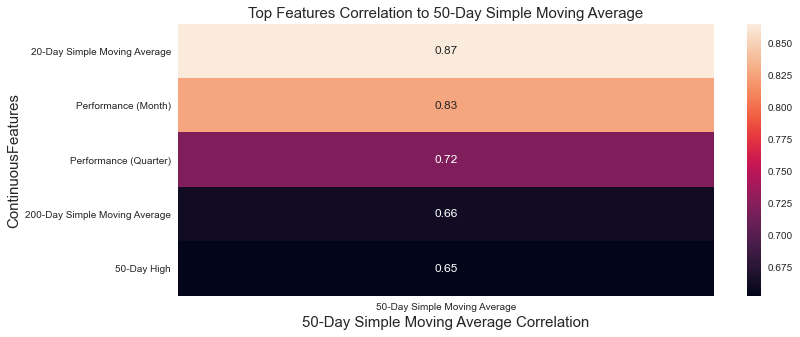

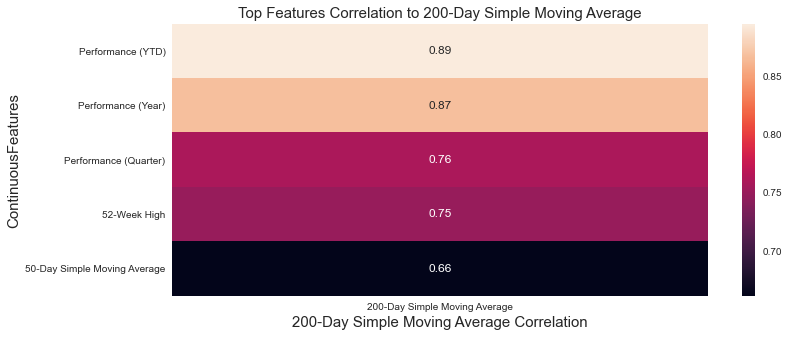

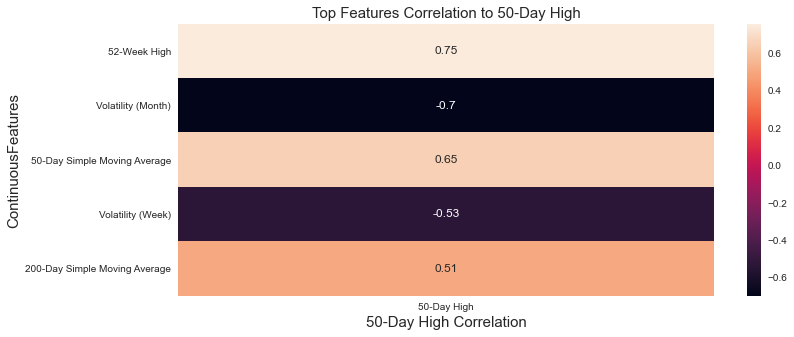

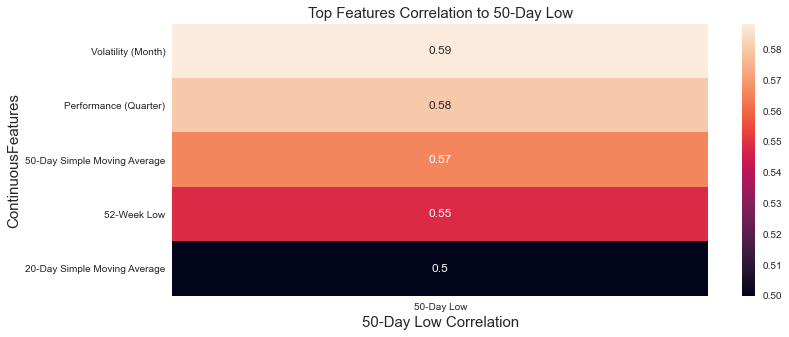

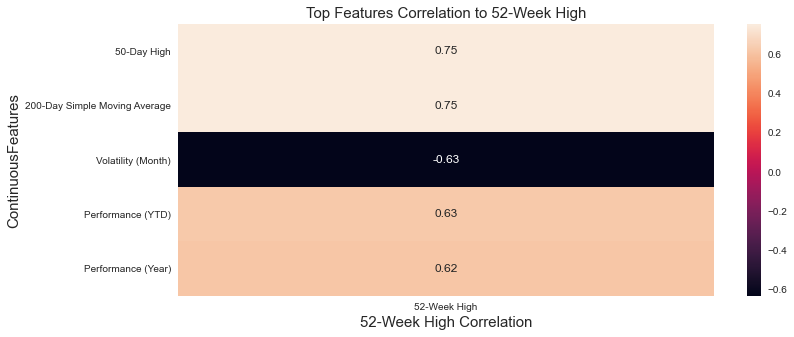

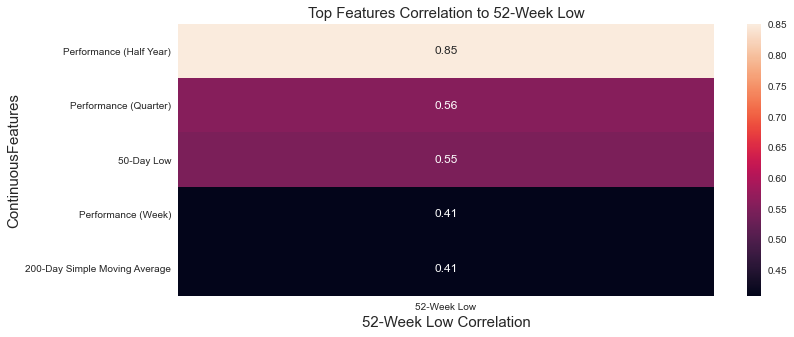

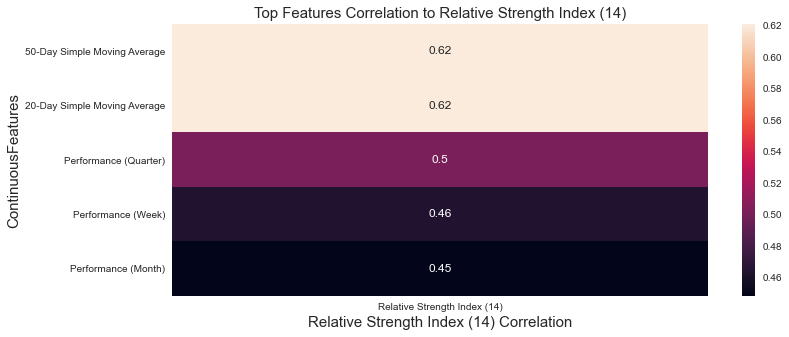

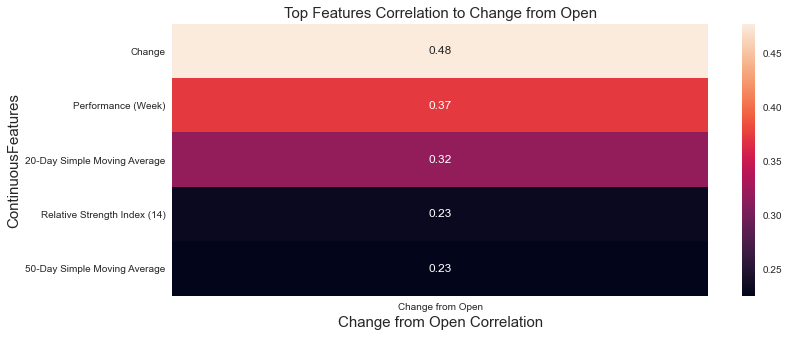

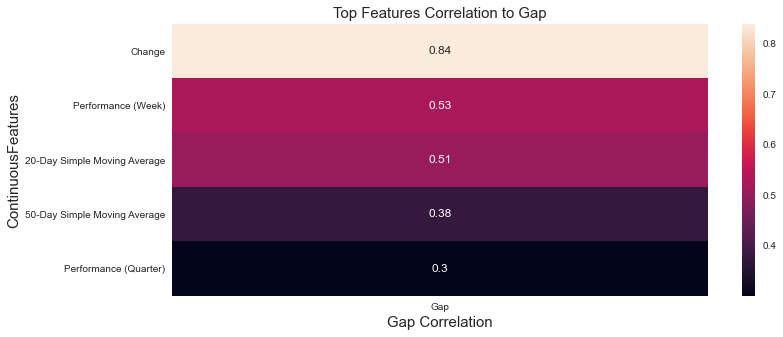

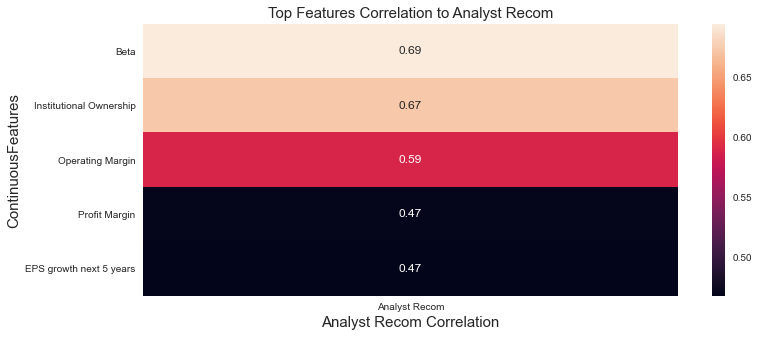

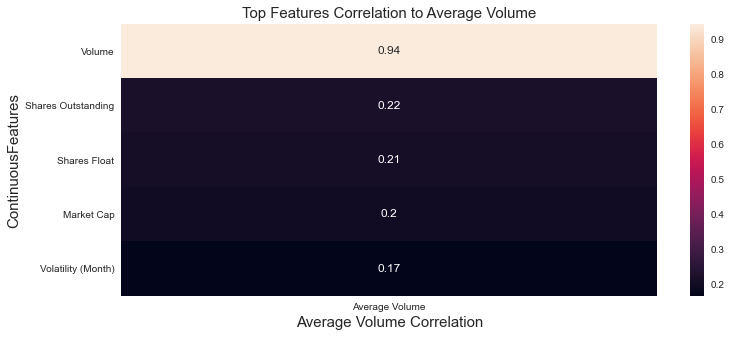

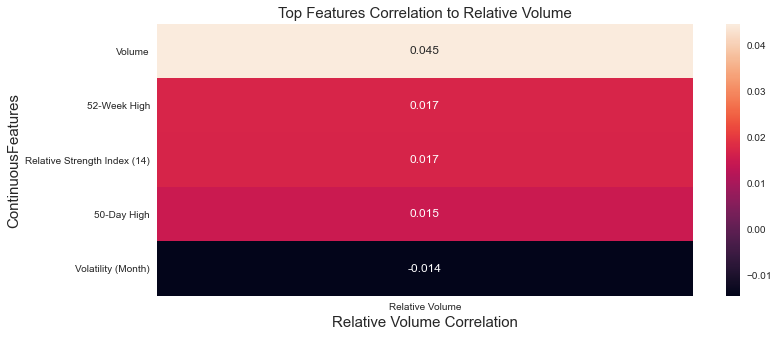

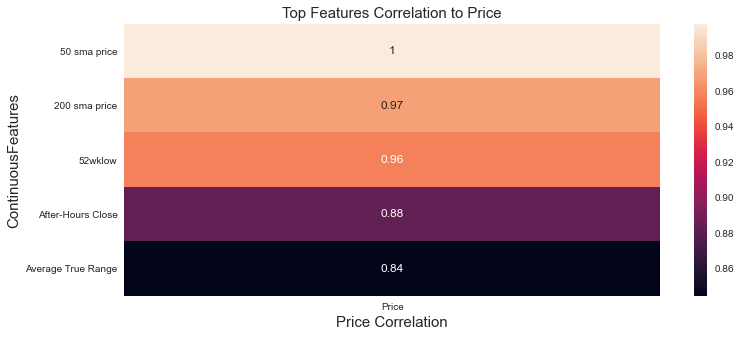

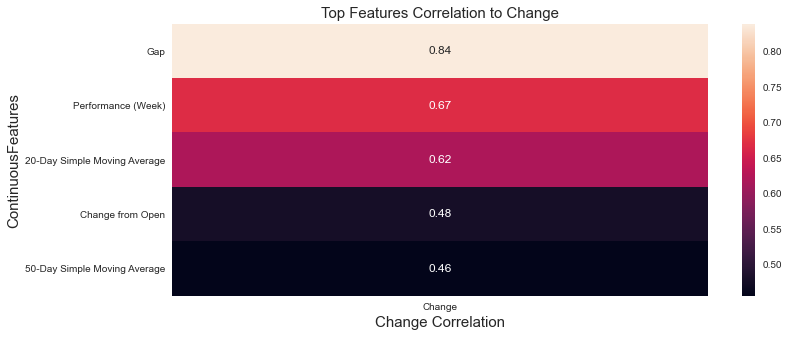

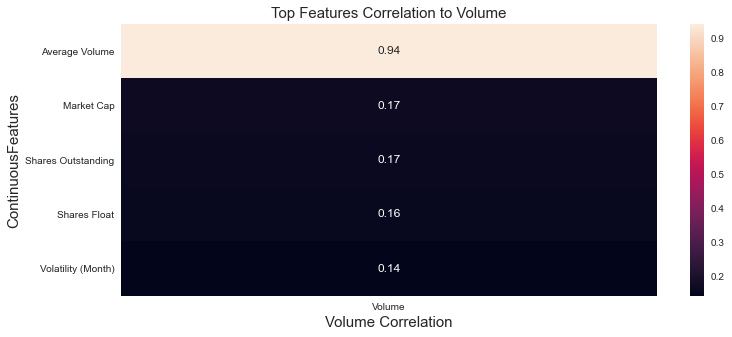

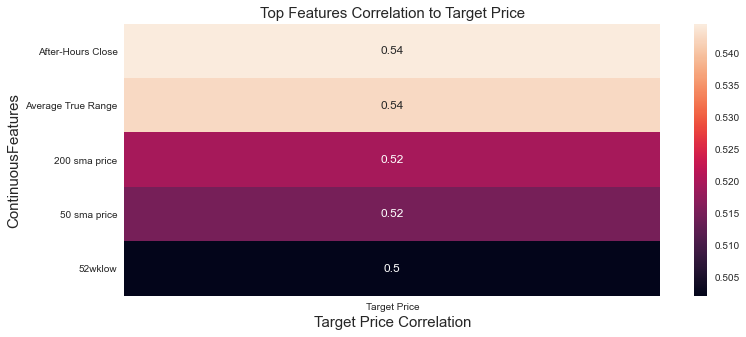

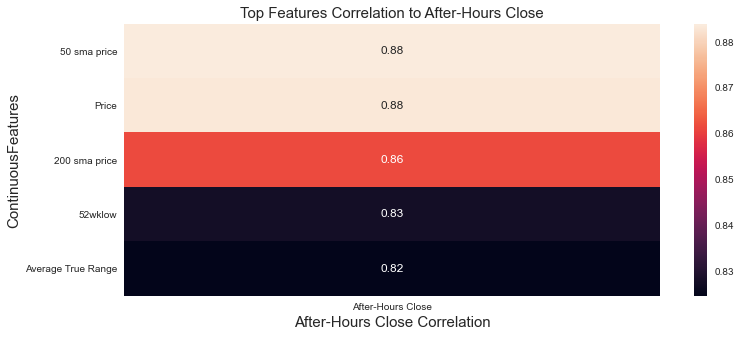

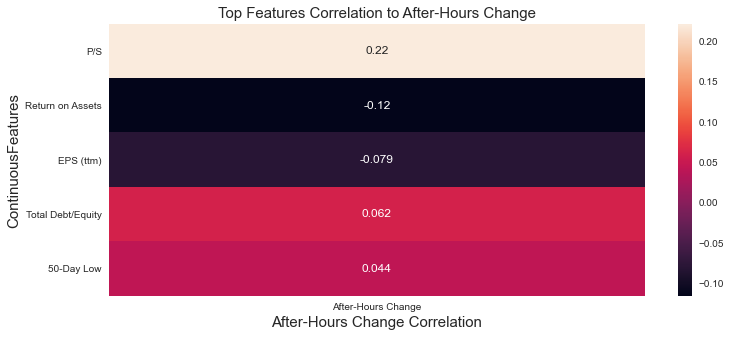

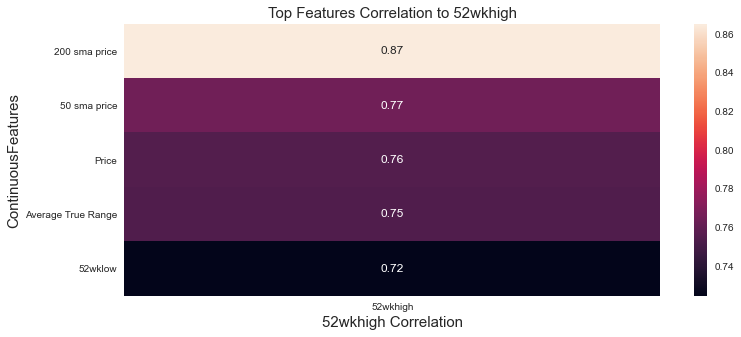

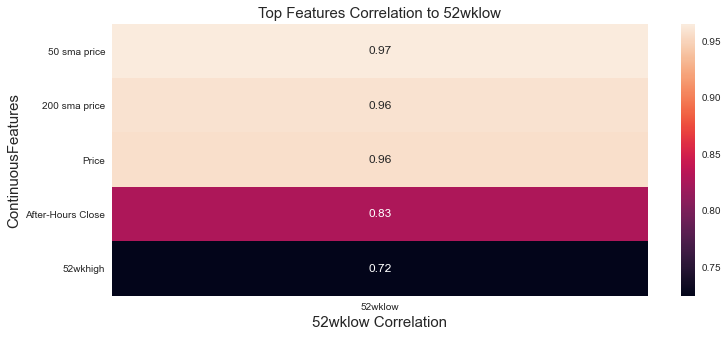

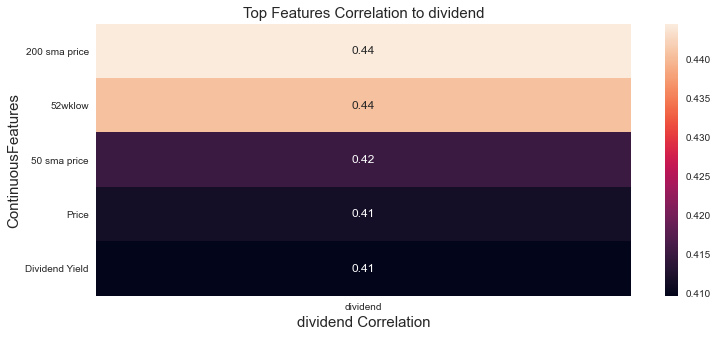

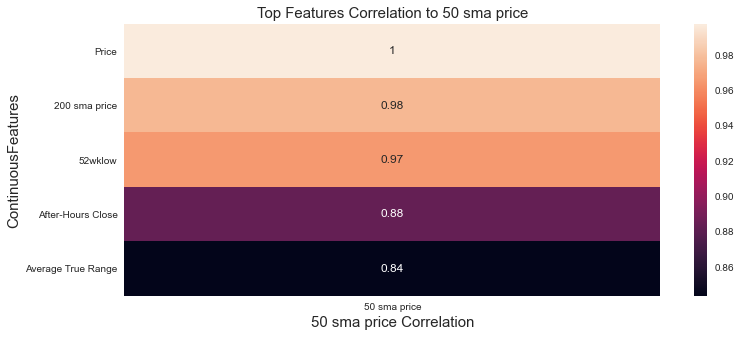

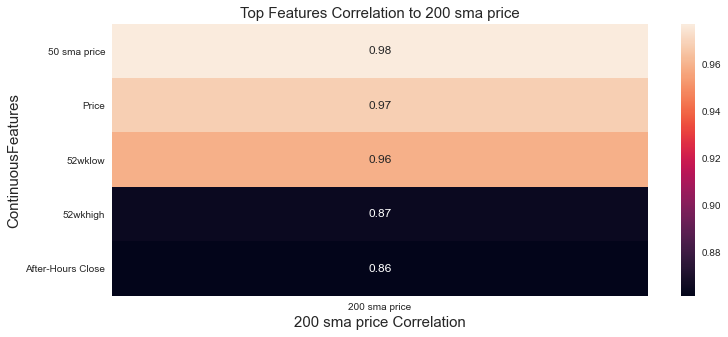

In [51]:
#plotting vertical heatmap correlation for continuous features
nfeatures = 5
for column in df_fin_num.columns:
    plt.figure(figsize = (12,5))
    new_df = np.abs(df_fin_num.corr())[[column]].sort_values(by = column, ascending = False)
    sns.heatmap(df_fin_num.corr()[new_df.index[1:nfeatures+1]].T[[column]], annot = True)
    plt.title('Top Features Correlation to ' + column, fontsize = 15)
    plt.xlabel(column +' Correlation', fontsize = 15)
    plt.ylabel('ContinuousFeatures', fontsize = 15);

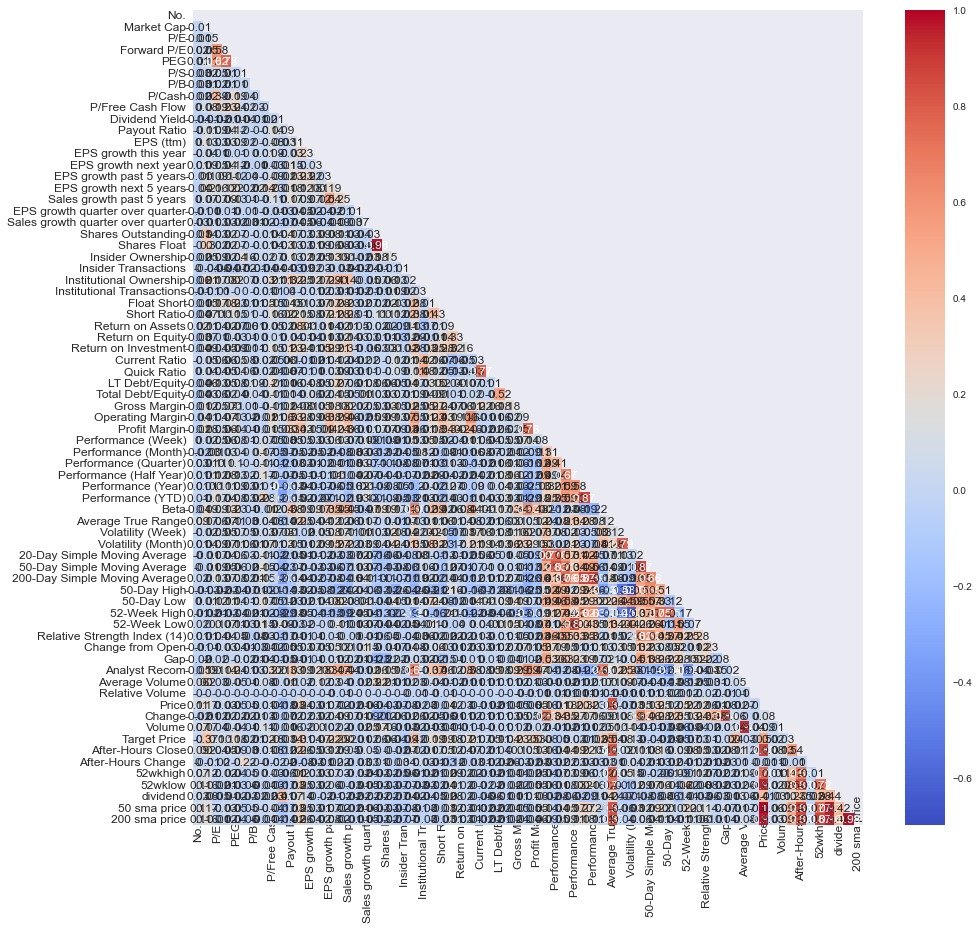

In [52]:
corr=round(df_fin_num.corr(),2)
fix, ax = plt.subplots(figsize=(15,15))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
ax = sns.heatmap(corr,mask=mask, ax=ax, annot=True, cmap='coolwarm')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, va="center")
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, va="center")

plt.show()

### these features have yet to be dropped for collinearity

In [53]:
correlated_features = set()

# Collinearity threshold here is set at 0.9
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[j, i]) > 0.9:
            colname = corr.columns[j]
            correlated_features.add(colname)

print("Collinear Columns to drop: ", correlated_features)
print("Number of Collinear Features",len(correlated_features))

Collinear Columns to drop:  {'52wklow', 'Shares Outstanding', 'Price', 'Average Volume', '50 sma price'}
Number of Collinear Features 5


In [54]:
correlated_features = set()

# Collinearity threshold here is set at 0.9
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[j, i]) > 0.9:
            colname = corr.columns[i]
            correlated_features.add(colname)

print("Collinear Columns to drop: ", correlated_features)
print("Number of Collinear Features",len(correlated_features))

Collinear Columns to drop:  {'52wklow', '200 sma price', 'Shares Float', 'Volume', '50 sma price'}
Number of Collinear Features 5


In [55]:
def subplot_scatter(dataframe, list_of_columns, list_of_titles, list_of_xlabels,targetY):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3,sharex=False,sharey=False,figsize=(15,nrows*6)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column],dataframe[targetY]) 
        for x,titles in enumerate(list_of_titles):
            ax[x].title.set_text(titles)
    
    # targetY = the column name that i want to predict, str format
    

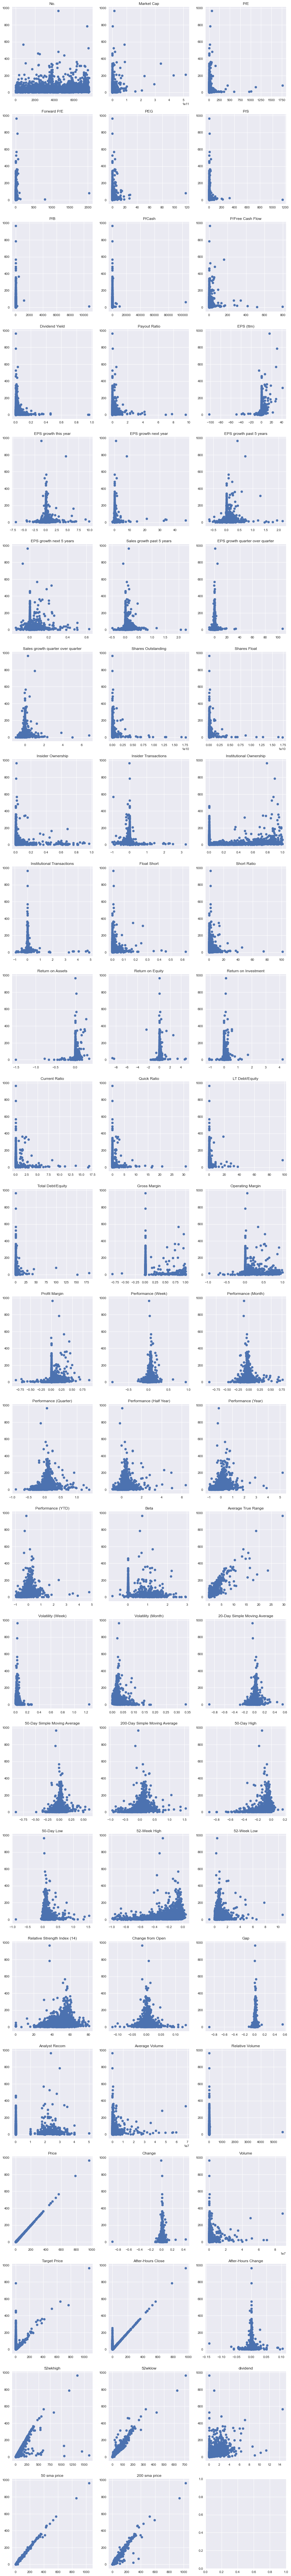

In [56]:
subplot_scatter(df_fin_num,df_fin_num.columns,df_fin_num.columns,df_fin_num.columns,'Price')

Using boxplot for Analyst Recom, it seems to be an categorical - ordinal feature, however with a continuous range hence used scatterplot first, but now using boxplot to further drill down for understanding 

As seen from the boxplot, it seems that with higher analyst recommendation, stock price does not equate to higher. 

The feature should still be kept, since it is just an analyst recommendation. 

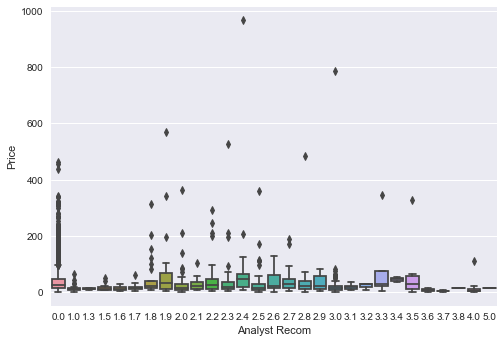

In [57]:

sns.boxplot(x=df_fin_num['Analyst Recom'],y=df['Price'])

Collinear Columns to drop:  {'Price', 'Volatility (Week)', 'Shares Outstanding'}
Collinear Columns to drop:  {'After-Hours Close', 'Shares Float', 'Volatility (Month)'}


Based on the correlation matrix, i can know which features are highly correlated to each other, hence it can be dropped off. 

I will choose to drop 'After-Hours Close', 'Shares Outstanding', 'Volatility (Week)', 

# EDA - categorical features using boxplot

Step 1: see the number of unique values, if there is too many unique types, it is not possible to plot
Step 2: interpret the boxplot IQR range, we want to observe that each type of unique value has a differing IQR , i.e. if i have 6 types of categorical values for that feature, and all has the same IQR range, it is not good to keep such a feature

In [58]:
df_fin_cat = df_fin.select_dtypes(include = str_columns)

In [59]:
for i in df_fin_cat.columns:
    print(f'{i} # of unique values is {df_fin_cat[i].nunique()}')

Ticker # of unique values is 3493
Company # of unique values is 3484
Sector # of unique values is 1
Industry # of unique values is 19
Country # of unique values is 26
Earnings Date # of unique values is 101
IPO Date # of unique values is 1966
goldencross # of unique values is 3
rsi # of unique values is 3


In [60]:
selected_fin_cat = ['Industry','Country']
df_fin_cat = df_fin_cat[selected_fin_cat]

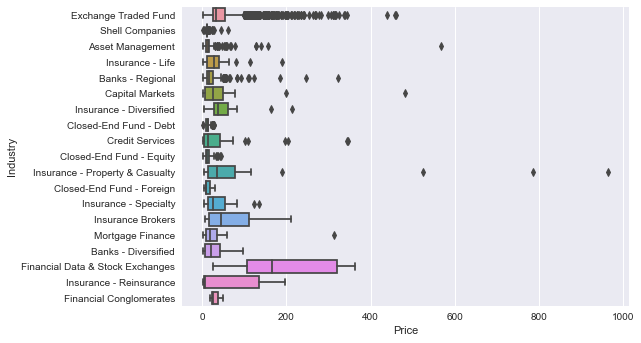

In [61]:
sns.boxplot(y=df_fin_cat['Industry'],x=df['Price'])

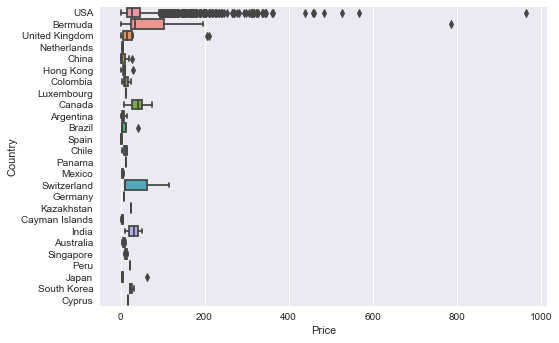

In [62]:
sns.boxplot(y=df_fin_cat['Country'],x=df['Price'])

cat_cols = df_fin_cat.columns
nrows = int(np.ceil(len(cat_cols)/3)) 
fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows*3.5)) 
ax = ax.ravel() 
for i, col in enumerate(cat_cols): 
    sns.boxplot(x = df_fin_cat[col], y = df['Price'], width = 0.3, ax = ax[i],orient="v")
    ax[i].set_title(col, fontsize=14)  
    ax[i].tick_params(axis='x', rotation=90, labelsize=12)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
plt.tight_layout()

cat_cols = df_fin_cat.columns
nrows = int(np.ceil(len(cat_cols)/2)) 
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, nrows*3.5)) 
ax = ax.ravel() 
for i, col in enumerate(cat_cols): 
    sns.boxplot(y = df_fin_cat[col], x = df['Price'], ax = ax[i])
    ax[i].set_title(col, fontsize=14)  

In [63]:
df.to_csv('./dataset/x.csv',index=False)